# **Analisis Sentimen Pengguna Aplikasi KAI Accesss**

berikut perbaikan code sesuai dengan contoh alur perhitungan kode


1.   Import library & data
2.   case folding
2.   cleaning
3.   tokenizing
4.   stopword
5.   normalized
6.   stemming
-----------------------------------------
7.   TF-IDF
6.   Training Data ( machine learning )
7.   Comparative evaluation



In [27]:
!pip install googletrans==4.0.0-rc1

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install nrclex

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.   Import library & data

In [30]:
# Import Library Dasar untuk Analisis Data
import pandas as pd           # Manipulasi data dalam format tabel (DataFrame), membaca, mengolah, dan analisis dataset
import numpy as np            # Operasi numerik dan perhitungan matematis dalam array/matriks multidimensi
import datetime as dt         # Mengolah tanggal dan waktu (penanggalan, timestamp, interval waktu)
import re                     # Regular expression untuk memanipulasi teks atau pencocokan pola pada string
import string                 # Memanipulasi kumpulan karakter dan string (tanda baca, alfabet, dll.)

# Import Library Visualisasi untuk Menampilkan Data secara Grafis
import seaborn as sns                  # Membuat visualisasi data statistik dengan grafik yang cantik dan informatif
import matplotlib.pyplot as plt        # Membuat grafik dasar seperti bar plot, scatter plot, histogram, line plot
import plotly.express as px            # Membuat visualisasi interaktif yang dinamis seperti bar plot, scatter, pie chart secara mudah
import plotly.graph_objects as go      # Menyediakan visualisasi interaktif yang lebih kompleks seperti dashboard interaktif
from wordcloud import WordCloud        # Membuat visualisasi teks berupa awan kata berdasarkan frekuensi kemunculan kata

# Import Library NLP (Natural Language Processing) untuk Pengolahan Teks
import nltk                               # Library utama untuk berbagai fungsi pemrosesan bahasa alami (tokenizing, stemming, stopwords, dll.)
from nltk.corpus import stopwords         # Mengambil daftar kata umum (stopwords) seperti "dan", "atau", "adalah" yang sering dibuang dalam analisis teks
from nltk.tokenize import word_tokenize   # Memecah teks menjadi unit lebih kecil (token) seperti kata atau tanda baca
from nltk.stem.porter import PorterStemmer # Mengubah kata ke bentuk dasarnya (stemming), misalnya "running" menjadi "run"
from nltk.probability import FreqDist     # Menghitung frekuensi kemunculan kata dalam kumpulan teks
from textblob import TextBlob             # Library untuk analisis teks sederhana, seperti pemeriksaan grammar, koreksi kata, dan analisis sentimen

# Download resources nltk (jika belum di-download)
nltk.download('stopwords', quiet=True)    # Download daftar stopwords (kata-kata umum seperti "dan", "atau", "adalah") dari NLTK
nltk.download('punkt', quiet=True)         # Download paket tokenisasi (alat untuk memecah teks menjadi kata-kata)

# Inisialisasi objek stemmer
stemmer = PorterStemmer()                  # Membuat objek untuk melakukan stemming (mengubah kata ke bentuk dasar seperti "running" -> "run")

# Import Library Machine Learning
from sklearn.model_selection import train_test_split   # Membagi dataset menjadi data latih dan data uji
from sklearn.feature_extraction.text import TfidfVectorizer # Mengubah teks menjadi representasi numerik (TF-IDF) agar bisa diproses oleh algoritma ML
from sklearn.svm import SVC                             # Menggunakan Support Vector Machine untuk klasifikasi data
from sklearn.metrics import (                           # Menghitung dan menampilkan metrik evaluasi performa model
    accuracy_score,         # Mengukur akurasi prediksi model
    recall_score,           # Mengukur seberapa baik model menemukan data positif (sensitivity)
    precision_score,        # Mengukur akurasi prediksi positif model
    confusion_matrix,       # Menyusun matriks kesalahan prediksi (true positive, false positive, true negative, false negative)
    classification_report   # Menampilkan laporan lengkap metrik evaluasi model dalam bentuk tabel
)

from nrclex import NRCLex
from googletrans import Translator



# **Ambil ulasan pengguna aplikasi KAI Access dari situs web Google Play.**

Dalam tahap mengambil ulasan aplikasi KAI Access, saya mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll

## **1.1  Data Acquisition (Scrapping Data)**

> Add blockquote





**Data Collection App review Exporter**

langkah pertama yang dilakukan adalah menginstal pustaka google-play-scraper untuk mendapatkan data dari Google Play Store.



In [31]:
pip install google-play-scraper

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **1.2 Mengambil Data**



Sumber data diperoleh dari **Google Play Store** pada halaman aplikasi KAI Access dengan URL berikut:


🔗[KAI Access - Google Play Store](https://play.google.com/store/apps/details?id=com.kai.kaiticketing)



Untuk pengambilan data, digunakan metode web scraping dengan mengambil ID aplikasi:
**com.kai.kaiticketing**

Data yang diambil sebanyak :
500 ulasan dalam bahasa Indonesia

In [32]:
# from google_play_scraper import Sort, reviews

# resultt, continuation_token = reviews(
#     'com.kai.kaiticketing',
#     lang='id',  # Bahasa Indonesia
#     country='id',  # Sumber Data Review Google Play Store Indonesia
#     sort=Sort.RATING,  # Rating tertinggi/terendah
#     count=500,  # Ambil 500 ulasan
#     filter_score_with=5  # Hanya ambil ulasan dengan rating 5
# )

# # Jika ingin melanjutkan pengambilan data
# if continuation_token:
#     additional_result, _ = reviews(
#         'com.kai.kaiticketing',
#         continuation_token=continuation_token
#     )
#     resultt.extend(additional_result)

# # Konversi ke DataFrame
# df = pd.DataFrame(resultt)

# # Simpan ke CSV
# df.to_csv('DatasetMentahKAI.csv', index=False, encoding='utf-8')

In [33]:
# resultt

Download ke format csv

## **1.3 Tahap Membaca dan Membuat Data Frame**

In [34]:
import pandas as pd

# Membaca dataset
KAI = pd.read_csv('../Dataset/Data Collection/Data-Mentah/DatasetMentahAccessbyKAI.csv')

# Atur tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)   # <--- dibatasi lebih kecil supaya kolom lebar pendek
pd.set_option('display.width', 1200)
pd.set_option('display.max_rows', 10)

# Potong kolom userImage supaya lebih pendek
KAI['userImage'] = KAI['userImage'].astype(str).str.slice(0, 15) + '...'  # <--- potong hanya 15 karakter

# Tampilkan
display(KAI.head(10))


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,921895ee-4446-4bda-990b-f42efb7f2946,Pengguna Google,https://play-lh...,Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk ...,5,54,1.6.1.2,9/3/2019 8:32,NaN,NaN,1.6.1.2
1,c4e847dd-5e6b-4980-a9e1-c3f86718e30b,Pengguna Google,https://play-lh...,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan...",5,0,4.3.3,9/24/2021 6:54,NaN,NaN,4.3.3
2,31c498ea-70cb-4fc7-ae20-8af6225efcbe,Sigit Rahardjo,https://play-lh...,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua...",5,35,5.0.5,11/5/2022 8:24,Terima kasih telah menggunakan aplikasi KAI Access. Kami akan menjadikan ini sebagai masukan unt...,5/18/2022 3:38,5.0.5
3,48b504ac-9350-4028-b14a-fa1924665ffc,Muhammad Yusabbi,https://play-lh...,dengan access bu Kai semua jadi mudah memesan tiket KA,5,0,6.11.1,3/21/2025 15:49,NaN,NaN,6.11.1
4,25f3ca9c-d93d-40df-97a3-a211ef1df635,Pengguna Google,https://play-lh...,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. ...",5,0,1.4.8.1,6/4/2019 4:16,NaN,NaN,1.4.8.1
5,1d23543b-4f13-41ff-8c1f-1cc3144e03be,Menik Widiati,https://play-lh...,Pelayanan baik menyenangkan perjalanan semua jadi lancar dan selalu mendapatkan tempat duduk tid...,5,0,NaN,11/4/2020 13:42,NaN,NaN,NaN
6,b6dac31a-e1ac-4dab-9115-95d04482197b,Heri Hermawan,https://play-lh...,"Setelah 10 thn, baru 2 minggu lalu sy kembali naik kereta, dan menggunakan aplikasi ini, secara ...",5,5,4.4.4,3/19/2021 6:30,NaN,NaN,4.4.4
7,cc8777c6-b406-4365-8331-617429e0c773,Pengguna Google,https://play-lh...,Aplikasi ini sudah bagus. Tp saya mau kasih masukan lagi untuk aplikasi ini.. Soal lupa password...,5,0,1.1.1.2,4/14/2020 17:48,NaN,NaN,1.1.1.2
8,bbf6ed89-8185-4643-b376-e6e9a0c8eb2e,davin praksa,https://play-lh...,semenjak ada aplikasi kai access saya sangat mudah untuk berpergian karena bisa langsung pesan t...,5,0,NaN,11/21/2023 3:24,NaN,NaN,NaN
9,a2ba2ff8-f536-4351-87fa-059cc7b3de75,Pengguna Google,https://play-lh...,Aplikasi yang keren dan selalu pake ini kalo mau pesen tiket kereta. Tp KENAPA? Kenapa gabisa tr...,5,24,1.5.1.3,8/12/2019 16:31,NaN,NaN,1.5.1.3


## **1.4 Tahap Eksplorasi Data**

In [35]:
# import pandas as pd

# KAI = pd.DataFrame(resultt)


In [36]:
KAI.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], dtype='object')

In [37]:
KAI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              781 non-null    object
 1   userName              781 non-null    object
 2   userImage             781 non-null    object
 3   content               781 non-null    object
 4   score                 781 non-null    int64 
 5   thumbsUpCount         781 non-null    int64 
 6   reviewCreatedVersion  680 non-null    object
 7   at                    781 non-null    object
 8   replyContent          90 non-null     object
 9   repliedAt             90 non-null     object
 10  appVersion            680 non-null    object
dtypes: int64(2), object(9)
memory usage: 67.2+ KB


### **1.4.1 Mencari missing value dan hapus missing value**

In [38]:
import pandas as pd
from IPython.display import display

# Ubah list hasil reviews() jadi DataFrame
KAI = pd.DataFrame(KAI)

# Buat DataFrame untuk jumlah dan persentase missing value (sebelum diisi missing value)
missing_data_original = pd.DataFrame({
    'Jumlah Missing': KAI.isnull().sum(),
    'Persentase (%)': (KAI.isnull().sum() / len(KAI)) * 100
})

# Salin DataFrame untuk diproses
KAI2 = KAI.copy()

# Isi missing value dengan "Tidak Ada"
KAI2[['replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion']] = KAI2[[
    'replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion']].fillna("Tidak Ada")

# Buat DataFrame untuk jumlah dan persentase missing value (setelah diisi missing value)
missing_data_filled = pd.DataFrame({
    'Jumlah Missing': KAI2.isnull().sum(),
    'Persentase (%)': (KAI2.isnull().sum() / len(KAI2)) * 100
})

# Gabungkan kedua DataFrame untuk perbandingan (sebelum vs setelah)
comparison_missing_data = pd.concat([missing_data_original, missing_data_filled], axis=1, keys=["Original", "Isi Missing Value"])

# Tampilkan hasil
display(comparison_missing_data)


Original                Isi Missing Value               
                     Jumlah Missing Persentase (%)    Jumlah Missing Persentase (%)
reviewId                          0       0.000000                 0            0.0
userName                          0       0.000000                 0            0.0
userImage                         0       0.000000                 0            0.0
content                           0       0.000000                 0            0.0
score                             0       0.000000                 0            0.0
...                             ...            ...               ...            ...
reviewCreatedVersion            101      12.932138                 0            0.0
at                                0       0.000000                 0            0.0
replyContent                    691      88.476312                 0            0.0
repliedAt                       691      88.476312                 0            0.0
appVersion                      101      12.932138                 0            0.0

[11 rows x 4 columns]

### **1.4.2 Visualisasi Data**

In [39]:
import pandas as pd

# Load dataset
KAI2 = pd.read_csv('../Dataset/Data Collection/Data-Mentah/DatasetMentahAccessbyKAI.csv')

# Ganti nama kolom 'at' menjadi 'date'
KAI2.rename(columns={'at': 'date'}, inplace=True)

# Cek kolom-kolom setelah diganti
print('Mengecek nama kolom yang sudah diganti:', KAI2.columns.tolist())

# Simpan kembali ke file yang sama
KAI2.to_csv('../Dataset/Data Collection/Data-Mentah/DatasetMentahAccessbyKAI.csv', index=False)


Mengecek nama kolom yang sudah diganti: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'date', 'replyContent', 'repliedAt', 'appVersion']


In [40]:
# memisahkan tanggal yang terletak di timestamps
KAI2['date'] = pd.to_datetime(KAI2['date']).dt.date
KAI2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,date,replyContent,repliedAt,appVersion
0,921895ee-4446-4bda-990b-f42efb7f2946,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK0...,Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk ...,5,54,1.6.1.2,2019-09-03,NaN,NaN,1.6.1.2
1,c4e847dd-5e6b-4980-a9e1-c3f86718e30b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK0...,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan...",5,0,4.3.3,2021-09-24,NaN,NaN,4.3.3
2,31c498ea-70cb-4fc7-ae20-8af6225efcbe,Sigit Rahardjo,https://play-lh.googleusercontent.com/a-/ALV-UjVFyDjZusvqStC-QukhY26v1mbksfv09DTBLHUFWHhM8Ga_h9P6xA,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua...",5,35,5.0.5,2022-11-05,Terima kasih telah menggunakan aplikasi KAI Access. Kami akan menjadikan ini sebagai masukan unt...,5/18/2022 3:38,5.0.5
3,48b504ac-9350-4028-b14a-fa1924665ffc,Muhammad Yusabbi,https://play-lh.googleusercontent.com/a-/ALV-UjX7BFvkB2cOHFrf10kQsGwbo438PYQ4xDSg13-kw2E1iAbd4ufI,dengan access bu Kai semua jadi mudah memesan tiket KA,5,0,6.11.1,2025-03-21,NaN,NaN,6.11.1
4,25f3ca9c-d93d-40df-97a3-a211ef1df635,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK0...,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. ...",5,0,1.4.8.1,2019-06-04,NaN,NaN,1.4.8.1


# **Data Preparation**
## **2. Case Folding**

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../Dataset/Data Collection/Data-Mentah/DatasetMentahAccessbyKAI.csv')

# Memilih kolom yang ingin diproses (misalnya kolom 'score' dan 'content')
result = df[['score', 'content']]

# Tampilkan hasil
print(result)

# Save the result DataFrame to a new CSV file
result.to_csv('MengolahData1.csv', index=False)


     score                                                                                              content
0        5  Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk ...
1        5  Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan...
2        5  Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua...
3        5                                               dengan access bu Kai semua jadi mudah memesan tiket KA
4        5  utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. ...
..     ...                                                                                                  ...
776      1                                                                     ayoo perbanyak bintang satunya 👎
777      1  gimanaa sihhh jam 00.00 udah ngisi data penumpang tp eror truss,, nyoba refresh eh kereta ti

In [42]:
import pandas as pd

# Adjusting display options
pd.set_option('display.max_colwidth', None)

# Load dataset
KAI = pd.read_csv('../Dataset/Data Collection/Data-Mentah/DatasetMentahAccessbyKAI.csv')

# Select relevant columns
result = KAI[['score', 'content']]

# Case folding: ubah semua isi 'content' menjadi huruf kecil
result['content'] = result['content'].astype(str).str.lower()

# Display the resulting DataFrame
print(result)


     score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              content
0        5  saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak la

C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\1533863984.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['content'] = result['content'].astype(str).str.lower()


tahap selanjutnya saya dowloand dataset lalu memasukkannya ke dalam drive dengan nama DatasetMentahKAI lalu diubah isi datanya menjadi case folding.

# Cleanning
### Remove Punctuation (regex)
### Remove noisy teks ( manual )


remove :
1. hapus special karakter
  -  mengubah karakter non-ASCII menjadi karakter yang dapat dibaca.
  - mengganti karakter escape (tab/newline/backslash) -> menjadi spasi
  - menghapus link url dan tag (re.sub)
2. hapus angka
  - menggunakan regex (\d+)
3. hapus punchtuation
  - menghapus semua tanda baca (str.maketrans) -> diganti string kosong
4. hapus whitespace/spasi/multiple
  - menghapus spasi atau whitespace yang diawal dan akhir teks menggunakan metode -> strip()
5. hapus satu karakter
  - menggunakan regez (\b[a-zA-Z]\b)
6. hapus small words (3 kata)
7. memecah teks menjadi token
  - lib NLTK
  [link text](https://)



In [43]:
import pandas as pd
import string
import re
import nltk

nltk.download('punkt')
nltk.download('popular')  # This avoids missing resources

# 1. Load data
df = pd.read_csv('MengolahData1.csv')
MengolahData = df[['score', 'content']].copy()  # Correct column selection

# 2. Preprocessing functions

# Remove special characters and URLs
def remove_review_special(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

# Remove numbers
def remove_number(text):
    return re.sub(r"\d+", "", text)

# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Remove leading/trailing whitespaces
def remove_whitespace_LT(text):
    return text.strip()

# Remove multiple whitespaces
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

# Remove single character words
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# Remove small words but keeping exceptions
def remove_small_words(text):
    exceptions = ["kai", "tim"]  # List of exceptions
    pattern = r'\b(?!' + '|'.join(exceptions) + r')\w{1,3}\b'
    text = re.sub(pattern, '', text)
    return text

# 3. Apply preprocessing functions for the 'remove punctuation' column
MengolahData['remove punctuation'] = MengolahData['content'].apply(remove_review_special)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_number)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_punctuation)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_whitespace_LT)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_whitespace_multiple)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_single_char)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].apply(remove_small_words)

# 4. Apply case folding (just converting to lowercase) without punctuation removal
MengolahData['case folding'] = MengolahData['content'].str.lower()

# 5. Convert 'remove punctuation' column to lowercase (like case folding)
MengolahData['remove punctuation'] = MengolahData['remove punctuation'].str.lower()

# 6. Ensure the correct column order: score, content, case folding, remove punctuation
final_data = MengolahData[['score', 'content', 'case folding', 'remove punctuation']]

# 7. Save the resulting DataFrame to a new CSV file named 'Data-Punctualization.csv'
final_data.to_csv('Data-Punctualization.csv', index=False)

# Provide a link to download the file
# from google.colab import files
# files.download('/content/Data-Punctualization.csv')


<>:19: SyntaxWarning: invalid escape sequence '\w'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\w'
<>:36: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\1027827063.py:19: SyntaxWarning: invalid escape sequence '\w'
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\1027827063.py:36: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('\s+', ' ', text)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\sonic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C

In [44]:
import pandas as pd

# Adjusting display options
pd.set_option('display.max_colwidth', None)  # This will show full content without truncation

# Load your dataset
KAI = pd.read_csv('Data-Punctualization.csv')

# Combine/select the data (ambil kolom score dan content)
result = KAI[['score', 'content', 'case folding', 'remove punctuation']]

# Display the resulting DataFrame
display(result)


,score,content,case folding,remove punctuation
0,5,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. terimakasih.",saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi error monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terimakasih
1,5,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","nice app, cuman kadang sering error. kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. yaa untuk ukuran pengembangan sudah cukup bagus. sudah bintang lima yaa, pelayanan selalu memuaskan yaa😊",nice cuman kadang sering error kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan media sosialnya juag agar para user tahu bahwa apknya sedang maintenance atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan
2,5,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊","habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan cs, dan akhirnya semua histori hilang... yuuk pt.kai tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊",habis upgrade malah akun tidak bisa akses sampai perlu penanganan akhirnya semua histori hilang yuuk ptkai tingkatkan aplikasinya agar tidak terjadi lagi saat upgrade sistem pelanggan setia anda
3,5,dengan access bu Kai semua jadi mudah memesan tiket KA,dengan access bu kai semua jadi mudah memesan tiket ka,dengan access semua jadi mudah memesan tiket
4,5,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta Api Alternatif Perjalanan terbaik saat ini.","utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta api alternatif perjalanan terbaik saat ini.",pindah kursi menngganti terlalu lama tidak sistematis seperti aplikasi seblm lebih mudah dalam pemindahan kursi penumpang selebih keren kereta alternatif perjalanan terbaik saat
...,...,...,...,...
776,1,ayoo perbanyak bintang satunya 👎,ayoo perbanyak bintang satunya 👎,ayoo perbanyak bintang satunya
777,1,"gimanaa sihhh jam 00.00 udah ngisi data penumpang tp eror truss,, nyoba refresh eh kereta

In [45]:
po = pd.read_csv('Data-Punctualization.csv')
po.head()

,score,content,case folding,remove punctuation
0,5,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. terimakasih.",saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi error monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terimakasih
1,5,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","nice app, cuman kadang sering error. kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. yaa untuk ukuran pengembangan sudah cukup bagus. sudah bintang lima yaa, pelayanan selalu memuaskan yaa😊",nice cuman kadang sering error kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan media sosialnya juag agar para user tahu bahwa apknya sedang maintenance atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan
2,5,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊","habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan cs, dan akhirnya semua histori hilang... yuuk pt.kai tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊",habis upgrade malah akun tidak bisa akses sampai perlu penanganan akhirnya semua histori hilang yuuk ptkai tingkatkan aplikasinya agar tidak terjadi lagi saat upgrade sistem pelanggan setia anda
3,5,dengan access bu Kai semua jadi mudah memesan tiket KA,dengan access bu kai semua jadi mudah memesan tiket ka,dengan access semua jadi mudah memesan tiket
4,5,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta Api Alternatif Perjalanan terbaik saat ini.","utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta api alternatif perjalanan terbaik saat ini.",pindah kursi menngganti terlalu lama tidak sistematis seperti aplikasi seblm lebih mudah dalam pemindahan kursi penumpang selebih keren kereta alternatif perjalanan terbaik saat


In [46]:
slangs = open("../Dataset/Data Collection/Kamus/txt/kata_tidak_baku.txt", "r", encoding="utf-8")

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['ad ', ' ada'], ['seblm ', ' sebelum'], ['pergipulang ', ' pergi pulang'], ['cb ', ' coba'], ['accoutovodana ', ' account ovo dana'], ['ribed ', ' ribet'], ['wktu ', ' Waktu'], ['pnh ', ' pernah'], ['ujungnya ', ' ujung nya'], ['solnya ', ' soalnya'], ['mlm ', ' malem'], ['sape ', ' sampe'], ['mudahsayangnya ', ' mudah sayangnya'], ['kaiprosesnya ', ' kai proses nya'], ['mudahsayangnya ', ' mudah sayang nya'], ['menyulitkan ', ' menyulit kan'], ['tiketaplikasi ', ' tiket aplikasi'], ['mensupport ', ' me support'], ['bsisehingga ', ' bisa sehingga'], ['ktpnya ', ' ktp nya'], ['kedetect ', ' ke detect'], ['mudahmudahan ', ' mudah mudah an'], ['kemudahannya ', ' kemudahan ya'], ['tetiba ', ' tiba tiba'], ['diapp ', ' di aplikasi'], ['distasiun ', ' di stasiun'], ['sebelumnya ', ' sebelum nya'], ['awalnya ', ' awal nya'], ['ktpnya ', ' ktp nya'], ['ditingkatkan ', ' di tingkat kan'], ['aplikasinya ', ' aplikasi nya'], ['mudahsering ', ' mudah sering'], ['sendirinya ', ' sendiri nya'], ['

In [47]:
dict_slangs = {k.strip(): v.strip() for item in clear_slangs if len(item) == 2 for k, v in [item]}

dict_slangs

{'ad': 'ada',
 'seblm': 'sebelum',
 'pergipulang': 'pergi pulang',
 'cb': 'coba',
 'accoutovodana': 'account ovo dana',
 'ribed': 'ribet',
 'wktu': 'Waktu',
 'pnh': 'pernah',
 'ujungnya': 'ujung nya',
 'solnya': 'soalnya',
 'mlm': 'malem',
 'sape': 'sampe',
 'mudahsayangnya': 'mudah sayang nya',
 'kaiprosesnya': 'kai proses nya',
 'menyulitkan': 'menyulit kan',
 'tiketaplikasi': 'tiket aplikasi',
 'mensupport': 'me support',
 'bsisehingga': 'bisa sehingga',
 'ktpnya': 'ktp nya',
 'kedetect': 'ke detect',
 'mudahmudahan': 'mudah mudah an',
 'kemudahannya': 'kemudahan ya',
 'tetiba': 'tiba tiba',
 'diapp': 'di aplikasi',
 'distasiun': 'di stasiun',
 'sebelumnya': 'sebelum nya',
 'awalnya': 'awal nya',
 'ditingkatkan': 'di tingkat kan',
 'aplikasinya': 'aplikasi nya',
 'mudahsering': 'mudah sering',
 'sendirinya': 'sendiri nya',
 'informasinya': 'infromasi nya',
 'menemukannya': 'menemukan nya',
 'naek': 'naik',
 'ribetsoalnya': 'rumit',
 'pertamakali': 'pertama kali',
 'system': 'sistem'

In [48]:
clean_text = []
for review in po['remove punctuation']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

clean_text

['saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi kesalahan monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terima kasih',
 'bagus hanya terkadang sering kesalahan jika aplikasi dalam tahap pembenahan tolong bisa diinformasikan media sosialnya juga agar para pengguna tahu bahwa aplikasinya sedang pemeliharaan atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan',
 'habis pembaruan namun akun tidak bisa akses sampai perlu penanganan akhirnya semua histori hilang ayo pt kai tingkatkan aplikasi nya agar tidak terjadi lagi saat pembaruan sistem pelanggan setia anda',
 'dengan access semua sehingga mudah memesan tiket',
 'pindah kursi mengganti terla

In [49]:
po['normalization'] = clean_text

In [50]:
po.head()

,score,content,case folding,remove punctuation,normalization
0,5,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. terimakasih.",saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi error monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terimakasih,saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi kesalahan monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terima kasih
1,5,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","nice app, cuman kadang sering error. kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. yaa untuk ukuran pengembangan sudah cukup bagus. sudah bintang lima yaa, pelayanan selalu memuaskan yaa😊",nice cuman kadang sering error kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan media sosialnya juag agar para user tahu bahwa apknya sedang maintenance atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan,bagus hanya terkadang sering kesalahan jika aplikasi dalam tahap pembenahan tolong bisa diinformasikan media sosialnya juga agar para pengguna tahu bahwa aplikasinya sedang pemeliharaan atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan
2,5,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊","habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan cs, dan akhirnya semua histori hilang... yuuk pt.kai tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊",habis upgrade malah akun tidak bisa akses sampai perlu penanganan akhirnya semua histori hilang yuuk ptkai tingkatkan aplikasinya agar tidak terjadi lagi saat upgrade sistem pelanggan setia anda,habis pembaruan namun akun tidak bisa akses sampai perlu penanganan akhirnya semua histori hilang ayo pt kai tingkatkan aplikasi nya agar tidak terjadi lagi saat pembaruan sistem pelanggan setia anda
3,5,dengan access bu Kai semua jadi mudah memesan tiket KA,dengan access bu

In [51]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

po['final_text'] = po['normalization'].apply(lambda remove: remove_small_words(str(remove)))

po.head()

,score,content,case folding,remove punctuation,normalization,final_text
0,5,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. terimakasih.",saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi error monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terimakasih,saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi kesalahan monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terima kasih,saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi kesalahan monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terima kasih
1,5,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","nice app, cuman kadang sering error. kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. yaa untuk ukuran pengembangan sudah cukup bagus. sudah bintang lima yaa, pelayanan selalu memuaskan yaa😊",nice cuman kadang sering error kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan media sosialnya juag agar para user tahu bahwa apknya sedang maintenance atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan,bagus hanya terkadang sering kesalahan jika aplikasi dalam tahap pembenahan tolong bisa diinformasikan media sosialnya juga agar para pengguna tahu bahwa aplikasinya sedang pemeliharaan atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan,bagus hanya terkadang sering kesalahan jika aplikasi dalam tahap pembenahan tolong bisa diinformasikan media sosialnya juga agar para pengguna tahu bahwa aplikasinya sedang pemeliharaan atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan
2,5,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan s

## **2. Tokenizing**

**Cleaning Data**

menghapus noise dan menjadikan token


In [52]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the specific resource that's missing
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Hanya unduh punkt jika belum ada

# 1. Load data
KAI = pd.read_csv('Data-Punctualization.csv')

# 2. Pilih kolom yang dibutuhkan
MengolahData = KAI[['score', 'content', 'case folding', 'remove punctuation']].copy()

# 3. Tokenisasi langsung (tanpa wrapper karena punkt sudah diunduh)
MengolahData['tokenizing'] = MengolahData['remove punctuation'].apply(word_tokenize)

# # 4. Simpan hasil
MengolahData.to_csv('TokenizingData-Kai.csv', index=False)

# 5. Download dan tampilkan hasil
print('Tokenizing Result:\n')
print(MengolahData[['tokenizing']].head())

Tokenizing Result:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                        tokenizing
0  [saya, sebenarnya, kurang, setuju, pemberlakuan, wajib, menggunakan, tiket, seperti, karena, sesuai, untuk, para, lansia, tidak, mampu, memiliki, android, atau, keduanya, hanya, memudahkan, bagi, golongan, tertentu, saja, selain, menurut, saya, aplikasi, belum, matang, masih, banyak, terjadi, error, monopoli, pembayaran, oleh, linkaja, juga, memberatkan, seperti, gojek, gopay, grab, dengan, linkaja, harus, dompet, dibagi, seperti, tidak, efektif, terimakasih]
1                                             

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sonic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **STOP WORD**

In [53]:
import pandas as pd
import ast

# 1. Baca data tokenisasi
tokenized_data = pd.read_csv('TokenizingData-Kai.csv')

# 2. Gabungkan stopwords dari file dan daftar manual
stopwords_custom = set()

# Baca dari file .txt
with open('../Dataset/Data Collection/Kamus/txt/stopwordbahasa.txt', 'r') as file:
    stopwords_custom.update(file.read().splitlines())

# Tambahkan stopwords manual
manual_stopwords = [
    "deh", "nih", "sih", "eh", "ah", "ya", "oh", "loh", "kok", "hmm", "emm",
    "ayo", "beuhh", "hehe", "hihi", "wkwkwk", "wkwkwkwkwk", "heehehe", "heheheh",
    "huhu", "hiks", "huuhhh", "hufffff", "yaaakk", "yaud", "aaa", "uuuu",
    "euyyyyyy", "bobrooookkkk", "euyyyyy", "zonx", "hadehh", "woyy", "gbis",
    "membagongkan", "anjir", "tolol", "hadeeeehhhh", "siih", "hahahah", "Konoha",
    "ngab", "elaaaaaa", "mbokya", "yaaa", "wkwk", "poll", "lahh", "deehhhh",
    "wong", "dhoho", "remek", "jirr", "cok", "bobrok", "gblk", "anjirrr", "ehhh",
    "dahh", "zonk", "conk", "zong", "lohhh", "kocccaakkkk", "pliss", "baanngkeeeeee",
    "sihhh", "bisakha","yuuk",
    "yg", "dg", "dgn", "ny", "klo", "kalo", "ga", "gak", "krn", "tdk", "utk",
    "jd", "jgn", "sdh", "aja", "nyg", "sm", "mlu", "ken", "nan", "tau", "bikin",
    "bilang", "biar", "pen", "tuh", "si", "amp", "u",
    "bro", "mas", "well", "pls", "btw", "gg", "lol", "fyi",
    "idk", "cmiiw", "lmao", "otw",
    "dong", "dongg", "dunkz", "nya", "nyaa", "sich", "leee", "oiya",
    "in", "ki", "di", "ke", "bu", "an", "allah", "yah",
    "sdgkan", "sdg", "emg"
]

stopwords_custom.update(manual_stopwords)

# 3. Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    if isinstance(tokens, str):
        tokens = ast.literal_eval(tokens)  # Konversi string ke list jika diperlukan
    return [word for word in tokens if word.lower() not in stopwords_custom]

# 4. Buat kolom 'stopword'
tokenized_data['stopword'] = tokenized_data['tokenizing'].apply(remove_stopwords)

# 5. Simpan hasil
output_path = 'StopwordData-Kai.csv'
tokenized_data.to_csv(output_path, index=False)

# # 6. Download hasil (Google Colab)
# try:
#     from google.colab import files
#     files.download(output_path)
#     print(f"File berhasil diunduh: {output_path}")
# except:
#     print(f"File disimpan di: {output_path}")

# 7. Contoh output
print("\nContoh Hasil Stopword Removal:")
print(tokenized_data[['tokenizing', 'stopword']].head())


Contoh Hasil Stopword Removal:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      tokenizing                                                                                                                                                                                                                               stopword
0  ['saya', 'sebenarnya', 'kurang', 'setuju', 'pemberlakuan', 'wajib', 'menggunakan', 'tiket', 'seperti', 'karena', 'sesuai', 'untuk', 'para', 'lansia', 'tidak'

## **Normalization**

menganggti kata yang tidak baku menjadi baku dan
mengganti kata yang aneh

In [54]:
import pandas as pd

# Load data
normalized_data = pd.read_csv('StopwordData-Kai.csv', converters={'stopword': eval})

# Baca kamus normalisasi
normalized_word_dict = {}

with open("../Dataset/Data Collection/Kamus/txt/kata_tidak_baku.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(":", 1)
        if len(parts) == 2:
            tidak_baku = parts[0].strip()
            baku = parts[1].strip()
            normalized_word_dict[tidak_baku] = baku

# Fungsi untuk menghapus duplikat berturut-turut
def remove_consecutive_duplicates(document):
    return [word for i, word in enumerate(document) if i == 0 or word != document[i-1]]

# Fungsi normalisasi
def normalize_term(document):
    result = []
    for term in document:
        if term in normalized_word_dict:
            result.extend(normalized_word_dict[term].split())
        else:
            result.append(term)
    return remove_consecutive_duplicates(result)

# Proses normalisasi
normalized_data['normalized'] = normalized_data['stopword'].apply(normalize_term)

# Simpan hasil
output_path = 'NormalizedData-Kai.csv'
normalized_data.to_csv(output_path, index=False)

# Tampilkan hasil
print("\nContoh Hasil Normalisasi:")
print(normalized_data[['stopword', 'normalized']].head())


Contoh Hasil Normalisasi:
                                                                                                                                                                                                                                stopword                                                                                                                                                                                                                                   normalized
0  [setuju, pemberlakuan, wajib, tiket, sesuai, lansia, memiliki, android, memudahkan, golongan, aplikasi, matang, error, monopoli, pembayaran, linkaja, memberatkan, gojek, gopay, grab, linkaja, dompet, dibagi, efektif, terimakasih]  [setuju, pemberlakuan, wajib, tiket, sesuai, lansia, memiliki, android, memudahkan, golongan, aplikasi, matang, kesalahan, monopoli, pembayaran, linkaja, memberatkan, gojek, gopay, grab, linkaja, dompet, dibagi, efektif, terima, kasih]
1                                

In [55]:
import pandas as pd
from nrclex import NRCLex
from googletrans import Translator

# Load dataset
KAI2 = pd.read_csv('NormalizedData-Kai.csv')


# Inisialisasi Google Translator
translator = Translator()

# Fungsi untuk translate Bahasa Indonesia ke Inggris
def translate_text(text):
    if pd.isna(text):
        return ""
    try:
        translated = translator.translate(str(text), src='id', dest='en')
        return translated.text
    except:
        return ""

# Fungsi untuk deteksi emosi
def detect_emotion(text):
    if not text:
        return "No text"
    analysis = NRCLex(text)
    if not analysis.top_emotions:
        return "No emotion"
    return analysis.top_emotions[0][0]

# Translate content ke bahasa Inggris
KAI2['content_en'] = KAI2['content'].apply(translate_text)

# Deteksi emosi dari content yang sudah diterjemahkan
KAI2['Emotion'] = KAI2['content_en'].apply(detect_emotion)

# Ekstrak tahun dari kolom 'date'

# Tampilkan hasil
display(KAI2[['content', 'content_en', 'Emotion']].head())


,content,content_en,Emotion
0,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","I actually do not agree with the implementation of compulsory using e tickets like this because it is not suitable for the elderly and unable people who do not have Android or both.This only makes it easy for certain groups, besides that, in my opinion this application is not yet ripe and there are still many errors.Payment monopoly by Linkaja is also burdensome, such as Gojek with Gopay, Grab with OVO and KAI with Linkaja, there must be a wallet divided like this is not effective.Thank You.",positive
1,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","Nice app, but sometimes often errors.If the application is in the improvement stage, please be informed to social media, so that users know that the APK is maintenance or improvement.Yes, for the measure of development is good enough.It's five stars, service is always satisfying",trust
2,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊","After being upgraded, the account cannot be accessed ... until it is necessary to handle CS, and finally all history is lost ... Yuuk PT.",trust
3,dengan access bu Kai semua jadi mudah memesan tiket KA,With the Access Mrs. Kai all so it's easy to order train tickets,fear
4,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta Api Alternatif Perjalanan terbaik saat ini.","to move chairs, change it for too long and not systematic like the application seblm ... it's easier to move passenger seats ... the more, cool ... the best alternative trip trains at this time.",anticipation


In [56]:
import pandas as pd

# Load dataset
KAI2 = pd.read_csv('NormalizedData-Kai.csv')

# Buat kamus emosi sederhana bahasa Indonesia
emotion_dict = {
    'senang': 'Joy',
    'bahagia': 'Joy',
    'sedih': 'Sadness',
    'takut': 'Fear',
    'marah': 'Anger',
    'kecewa': 'Sadness',
    'cemas': 'Fear',
    'bangga': 'Trust',
    'terharu': 'Joy',
    'benci': 'Anger',
    # bisa tambah lagi sesuai kebutuhan
}

# Fungsi untuk mendeteksi emosi dari teks
def detect_emotion(text):
    if pd.isna(text):  # kalau teks kosong
        return "No text"
    text = str(text).lower()
    for word, emotion in emotion_dict.items():
        if word in text:
            return emotion
    return "No emotion"

# Terapkan fungsi ke kolom 'content' untuk buat kolom baru 'Emotion'
KAI2['Emotion'] = KAI2['content'].apply(detect_emotion)



# Tampilkan hasilnya
display(KAI2[['content', 'Emotion']].head())


,content,Emotion
0,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.",No emotion
1,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊",No emotion
2,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan aplikasinya yah.. agar tidak terjadi lagi saat upgrade sistem... #sbg pelanggan setia anda 😊",No emotion
3,dengan access bu Kai semua jadi mudah memesan tiket KA,No emotion
4,"utk pindah kursi, menngganti nya terlalu lama dan tidak sistematis seperti aplikasi seblm nya.. lebih mudah dalam pemindahan kursi penumpang.. selebih nya, keren.. kereta Api Alternatif Perjalanan terbaik saat ini.",No emotion


## **Stemming**
memengal menjadi kata dasar

In [57]:
# Install the Sastrawi library
!pip install Sastrawi

import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from IPython.display import display

def main():
    try:
        # Initialize stemmer
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        # Load data
        csv_path = "NormalizedData-Kai.csv"
        OlahData = pd.read_csv(csv_path)

        # Perform stemming and tokenization
        OlahData['stemming teks'] = OlahData['normalized'].astype(str).apply(
            lambda x: [stemmer.stem(word) for word in x.split() if word.strip()]
        )

        # Create a new DataFrame with selected columns
        result_df = pd.DataFrame({
             'score': OlahData['score'],
              'content': OlahData['content'],
              'case folding': OlahData['case folding'],
              'remove punctuation': OlahData['remove punctuation'],
              'stopword': OlahData['stopword'],
            'normalized': OlahData['normalized'],
            'stemming teks': OlahData['stemming teks'],
            'token count': OlahData['stemming teks'].apply(len)
        })

        # Save results to a new CSV file
        output_csv_path = "StemminData-KAI.csv"
        result_df.to_csv(output_csv_path, index=False)
        # print(f"Results saved successfully to {output_csv_path}")

        # Display the DataFrame
        print("\nDataFrame Structure:")
        display(result_df.head())

        return result_df

    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return pd.DataFrame()

if __name__ == "__main__":
    result_df = main()

    # Additional DataFrame info
    if not result_df.empty:
        print("\nDataFrame Information:")
        print(result_df.info())

        print("\nDataFrame Description:")
        print(result_df.describe())

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



DataFrame Structure:


,score,content,case folding,remove punctuation,stopword,normalized,stemming teks,token count
0,5,"Saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. Ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. Monopoli pembayaran oleh linkAja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan KAI dengan linkAja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. Terimakasih.","saya sebenarnya kurang setuju dgn pemberlakuan wajib menggunakan e tiket seperti ini karena tdk sesuai untuk para lansia dan org2 tidak mampu yg tdk memiliki android atau keduanya. ini hanya memudahkan bagi golongan tertentu saja, selain itu, menurut saya aplikasi ini belum matang dan masih banyak terjadi error. monopoli pembayaran oleh linkaja juga memberatkan, seperti gojek dgn gopay, grab dgn ovo dan kai dengan linkaja, harus ada brp dompet dibagi2 seperti ini tidak lah efektif. terimakasih.",saya sebenarnya kurang setuju pemberlakuan wajib menggunakan tiket seperti karena sesuai untuk para lansia tidak mampu memiliki android atau keduanya hanya memudahkan bagi golongan tertentu saja selain menurut saya aplikasi belum matang masih banyak terjadi error monopoli pembayaran oleh linkaja juga memberatkan seperti gojek gopay grab dengan linkaja harus dompet dibagi seperti tidak efektif terimakasih,"['setuju', 'pemberlakuan', 'wajib', 'tiket', 'sesuai', 'lansia', 'memiliki', 'android', 'memudahkan', 'golongan', 'aplikasi', 'matang', 'error', 'monopoli', 'pembayaran', 'linkaja', 'memberatkan', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'dibagi', 'efektif', 'terimakasih']","['setuju', 'pemberlakuan', 'wajib', 'tiket', 'sesuai', 'lansia', 'memiliki', 'android', 'memudahkan', 'golongan', 'aplikasi', 'matang', 'kesalahan', 'monopoli', 'pembayaran', 'linkaja', 'memberatkan', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'dibagi', 'efektif', 'terima', 'kasih']","[tuju, laku, wajib, tiket, sesuai, lansia, milik, android, mudah, golong, aplikasi, matang, salah, monopoli, bayar, linkaja, berat, gojek, gopay, grab, linkaja, dompet, bagi, efektif, terima, kasih]",26
1,5,"Nice App, Cuman Kadang Sering Error. Kalau Aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. Yaa untuk ukuran Pengembangan Sudah Cukup Bagus. Sudah Bintang Lima Yaa, Pelayanan Selalu Memuaskan yaa😊","nice app, cuman kadang sering error. kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan ke media sosialnya juag yaa, agar para user tahu bahwa apknya sedang maintenance atau pembenahan. yaa untuk ukuran pengembangan sudah cukup bagus. sudah bintang lima yaa, pelayanan selalu memuaskan yaa😊",nice cuman kadang sering error kalau aplikasi dalam tahap pembenahan tolong bisa diinfokan media sosialnya juag agar para user tahu bahwa apknya sedang maintenance atau pembenahan untuk ukuran pengembangan sudah cukup bagus sudah bintang lima pelayanan selalu memuaskan,"['nice', 'cuman', 'kadang', 'error', 'aplikasi', 'tahap', 'pembenahan', 'tolong', 'diinfokan', 'media', 'sosialnya', 'juag', 'user', 'apknya', 'maintenance', 'pembenahan', 'ukuran', 'pengembangan', 'bagus', 'bintang', 'pelayanan', 'memuaskan']","['bagus', 'hanya', 'terkadang', 'kesalahan', 'aplikasi', 'tahap', 'pembenahan', 'tolong', 'diinformasikan', 'media', 'sosialnya', 'juga', 'pengguna', 'aplikasinya', 'pemeliharaan', 'pembenahan', 'ukuran', 'pengembangan', 'bagus', 'bintang', 'pelayanan', 'memuaskan']","[bagus, hanya, terkadang, salah, aplikasi, tahap, benah, tolong, informasi, media, sosial, juga, guna, aplikasi, pelihara, benah, ukur, kembang, bagus, bintang, layan, muas]",22
2,5,"Habis di upgrade malah akun tidak bisa di akses.. sampai perlu penanganan CS, dan akhirnya semua histori hilang... Yuuk PT.KAI tingkatkan 


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   score               781 non-null    int64 
 1   content             781 non-null    object
 2   case folding        781 non-null    object
 3   remove punctuation  781 non-null    object
 4   stopword            781 non-null    object
 5   normalized          781 non-null    object
 6   stemming teks       781 non-null    object
 7   token count         781 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.9+ KB
None

DataFrame Description:
            score  token count
count  781.000000   781.000000
mean     3.555698    15.047375
std      1.922481    10.066398
min      1.000000     1.000000
25%      1.000000     7.000000
50%      5.000000    14.000000
75%      5.000000    21.000000
max      5.000000    48.000000


# **LABELING**
###Indonesia Sentiment lexicon (source: https://github.com/fajri91/InSet)

In [58]:
# Install library yang diperlukan
!pip install Sastrawi
!pip install pandas

import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from google.colab import files
import csv


# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membaca lexicon positive dan negative
lexicon_positive = dict()
lexicon_negative = dict()

try:
    # Membaca file negative.csv (sebagai lexicon positive)
    with open('../Dataset/Data Collection/Kamus/csv/negative.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        next(reader)  # skip header
        for row in reader:
            if len(row) >= 2:
                lexicon_positive[row[0].strip()] = int(row[1])

    # Membaca file positive.csv (sebagai lexicon negative)
    with open('../Dataset/Data Collection/Kamus/csv/positive.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        next(reader)  # skip header
        for row in reader:
            if len(row) >= 2:
                lexicon_negative[row[0].strip()] = int(row[1])

    print("Lexicon berhasil dimuat!")
    print(f"Jumlah kata positif: {len(lexicon_positive)}")
    print(f"Jumlah kata negatif: {len(lexicon_negative)}")

except Exception as e:
    print(f"Error saat memuat lexicon: {str(e)}")

# Fungsi analisis sentimen
def analisis_sentimen_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'Positive'
    elif score < 0:
        polarity = 'Negative'
    else:
        polarity = 'Neutral'
    return score, polarity

# Memproses data utama
try:
    # Membaca data yang sudah dinormalisasi
    OlahData = pd.read_csv('StemminData-KAI.csv')



    # Analisis sentimen
    OlahData[['sentiment_score', 'sentiment_label']] = OlahData['stemming teks'].apply(
        lambda x: pd.Series(analisis_sentimen_indonesia(x))
    )

    # Membuat DataFrame hasil
    result_df = pd.DataFrame({
        'normalized': OlahData['normalized'],
        'stemmed text': OlahData['stemming teks'],
        'token_count': OlahData['stemming teks'].apply(len)
    })

    # Menyimpan hasil
    output_path = 'LabelingData-KAI.csv'
    result_df.to_csv(output_path, index=False)

    # # Download hasil
    # files.download(output_path)

    # Menampilkan hasil
    print("\nHasil Analisis Sentimen:")
    display(result_df.head())

    print("\nDistribusi Sentimen:")
    print(result_df['sentiment_label'].value_counts())

except Exception as e:
    print(f"Error saat memproses data: {str(e)}")
        # Menyimpan hasil
    output_filename = 'LabelingData-KAI.csv'
    result_df.to_csv(output_filename, index=False)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Lexicon berhasil dimuat!
Jumlah kata positif: 6607
Jumlah kata negatif: 3609

Hasil Analisis Sentimen:



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,normalized,stemmed text,token_count
0,"['setuju', 'pemberlakuan', 'wajib', 'tiket', 'sesuai', 'lansia', 'memiliki', 'android', 'memudahkan', 'golongan', 'aplikasi', 'matang', 'kesalahan', 'monopoli', 'pembayaran', 'linkaja', 'memberatkan', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'dibagi', 'efektif', 'terima', 'kasih']","['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']",250
1,"['bagus', 'hanya', 'terkadang', 'kesalahan', 'aplikasi', 'tahap', 'pembenahan', 'tolong', 'diinformasikan', 'media', 'sosialnya', 'juga', 'pengguna', 'aplikasinya', 'pemeliharaan', 'pembenahan', 'ukuran', 'pengembangan', 'bagus', 'bintang', 'pelayanan', 'memuaskan']","['bagus', 'hanya', 'terkadang', 'salah', 'aplikasi', 'tahap', 'benah', 'tolong', 'informasi', 'media', 'sosial', 'juga', 'guna', 'aplikasi', 'pelihara', 'benah', 'ukur', 'kembang', 'bagus', 'bintang', 'layan', 'muas']",217
2,"['habis', 'pembaruan', 'akun', 'akses', 'penanganan', 'histori', 'hilang', 'pt', 'kai', 'tingkatkan', 'aplikasi', 'nya', 'pembaruan', 'sistem', 'pelanggan', 'setia']","['habis', 'baru', 'akun', 'akses', 'tangan', 'histori', 'hilang', 'pt', 'kai', 'tingkat', 'aplikasi', 'nya', 'baru', 'sistem', 'langgan', 'setia']",146
3,"['access', 'mudah', 'memesan', 'tiket']","['access', 'mudah', 'mes', 'tiket']",35
4,"['pindah', 'kursi', 'mengganti', 'sistematis', 'aplikasi', 'sebelum', 'mudah', 'pemindahan', 'kursi', 'penumpang', 'selebih', 'keren', 'kereta', 'alternatif', 'perjalanan', 'terbaik']","['pindah', 'kursi', 'ganti', 'sistematis', 'aplikasi', 'belum', 'mudah', 'pindah', 'kursi', 'tumpang', 'lebih', 'keren', 'kereta', 'alternatif', 'jalan', 'baik']",161



Distribusi Sentimen:
Error saat memproses data: 'sentiment_label'


In [59]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
labeling_kai = pd.read_csv('LabelingData-KAI.csv')

# Jika 'stemmed text' sudah berupa list, tidak perlu di split lagi, cukup salin ke kolom baru
labeling_kai['prepos_text'] = labeling_kai['stemmed text']

# Menampilkan beberapa contoh dari kolom baru untuk memastikan hasilnya
print(labeling_kai[['stemmed text', 'prepos_text']].head())


                                                                                                                                                                                                                                                 stemmed text                                                                                                                                                                                                                                                 prepos_text
0  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima

In [60]:
import pandas as pd
import csv
import ast

# Load dataset
df = pd.read_csv('LabelingData-KAI.csv')  # Ganti dengan path file kamu

# Load lexicon positive
lexicon_positive = dict()
with open('../Dataset/Data Collection/Kamus/csv/positive.csv', 'r') as csvfile:  # Ganti dengan path file kamu
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_positive[row[0].strip()] = int(row[1])

# Load lexicon negative
lexicon_negative = dict()
with open('../Dataset/Data Collection/Kamus/csv/negative.csv', 'r') as csvfile:  # Ganti dengan path file kamu
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_negative[row[0].strip()] = int(row[1])

# Fungsi analisis sentimen
def analisis_sentimen_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        polarity = 'Positive'
    elif score < 0:
        polarity = 'Negative'
    else:
        polarity = 'Neutral'
    return score, polarity

# Parsing string ke list
df['stemmed_list'] = df['stemmed text'].apply(ast.literal_eval)

# Terapkan analisis
results = df['stemmed_list'].apply(analisis_sentimen_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

# Lihat hasil distribusi
print(df['polarity'].value_counts())

# Simpan ke file baru (opsional)
df.to_csv('LabelingData-KAI.csv', index=False)


polarity
Positive    437
Negative    297
Neutral      47
Name: count, dtype: int64


In [61]:
print(df['polarity'].value_counts())

polarity
Positive    437
Negative    297
Neutral      47
Name: count, dtype: int64


C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\1849747728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=df, palette="pastel",


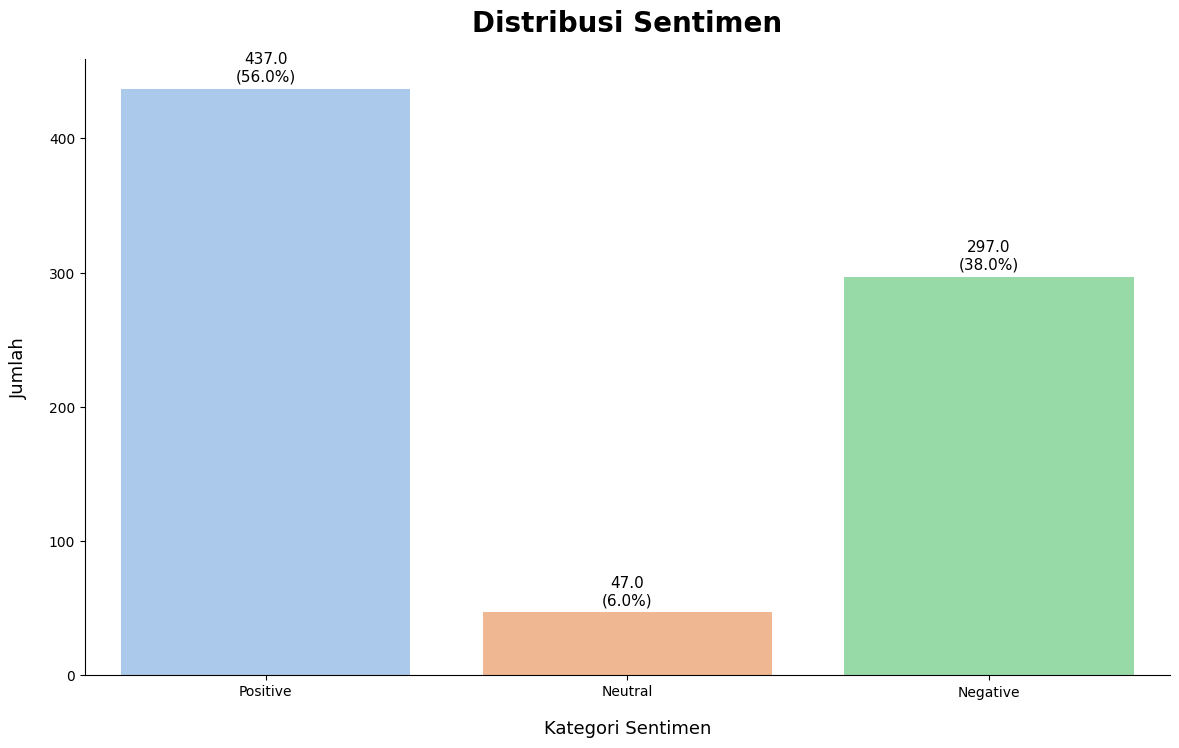

In [62]:
# Versi dengan persentase
total = len(df)
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='polarity', data=df, palette="pastel",
                  order=['Positive', 'Neutral', 'Negative'])

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 3.25,
            f'{height}\n({height/total:.1%})',  # Menampilkan jumlah dan persentase
            ha='center',
            va='bottom',
            fontsize=11)

plt.title("Distribusi Sentimen", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Kategori Sentimen", fontsize=13, labelpad=15)
plt.ylabel("Jumlah", fontsize=13, labelpad=15)
sns.despine()
plt.show()

In [63]:
# Konversi polarity menjadi angka
polarity_num = []

for convert in df['polarity']:
    if convert == "Positive":
        num_polarity = 1
    elif convert == "Negative":
        num_polarity = -1
    else:  # Neutral
        num_polarity = 0
    polarity_num.append(num_polarity)

# Masukkan ke kolom baru
df['polarity_num'] = polarity_num

# Lihat hasilnya
print(df['polarity_num'].value_counts())


polarity_num
 1    437
-1    297
 0     47
Name: count, dtype: int64


In [64]:
df['polarity']
# Save dataframe ke file CSV baru
df.to_csv('LabelingData-KAI.csv', index=False)

In [65]:
df.polarity.value_counts()

polarity
Positive    437
Negative    297
Neutral      47
Name: count, dtype: int64

In [66]:
print("Value counts:\n", df['polarity'].value_counts())
print("Unique values:", df['polarity'].unique())

Value counts:
 polarity
Positive    437
Negative    297
Neutral      47
Name: count, dtype: int64
Unique values: ['Positive' 'Neutral' 'Negative']


In [67]:
print("percentage of sentiment:")
value_counts = df['polarity'].value_counts()

# Define expected keys (modify based on your actual labels)
pos_key = 1    # or "positive"
neg_key = -1   # or "negative"

# Initialize percentages
train_pct_pos = value_counts.get(pos_key, 0) / value_counts.sum() * 100
train_pct_neg = value_counts.get(neg_key, 0) / value_counts.sum() * 100

print("percentage of positive sentiment:", round(train_pct_pos, 2), '%')
print("percentage of negative sentiment:", round(train_pct_neg, 2), '%')
print("difference:", round(train_pct_pos - train_pct_neg, 2), '%')

percentage of sentiment:
percentage of positive sentiment: 38.03 %
percentage of negative sentiment: 6.02 %
difference: 32.01 %


C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\2205905734.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_pct_pos = value_counts.get(pos_key, 0) / value_counts.sum() * 100
C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\2205905734.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_pct_neg = value_counts.get(neg_key, 0) / value_counts.sum() * 100


## **Hapus data netral**

tahap ini menghapus content yang bersentiment netral karena penelitiannya hanya menggunakan 2 sentiment yaitu positif dan negatif


In [68]:
df = df[df['polarity_num'] != 0].reset_index(drop=True)
df = df.reset_index(drop=True)
df.to_csv('LabelingData-KAI.csv', index=False)

C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\3579637536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=df, palette="pastel",


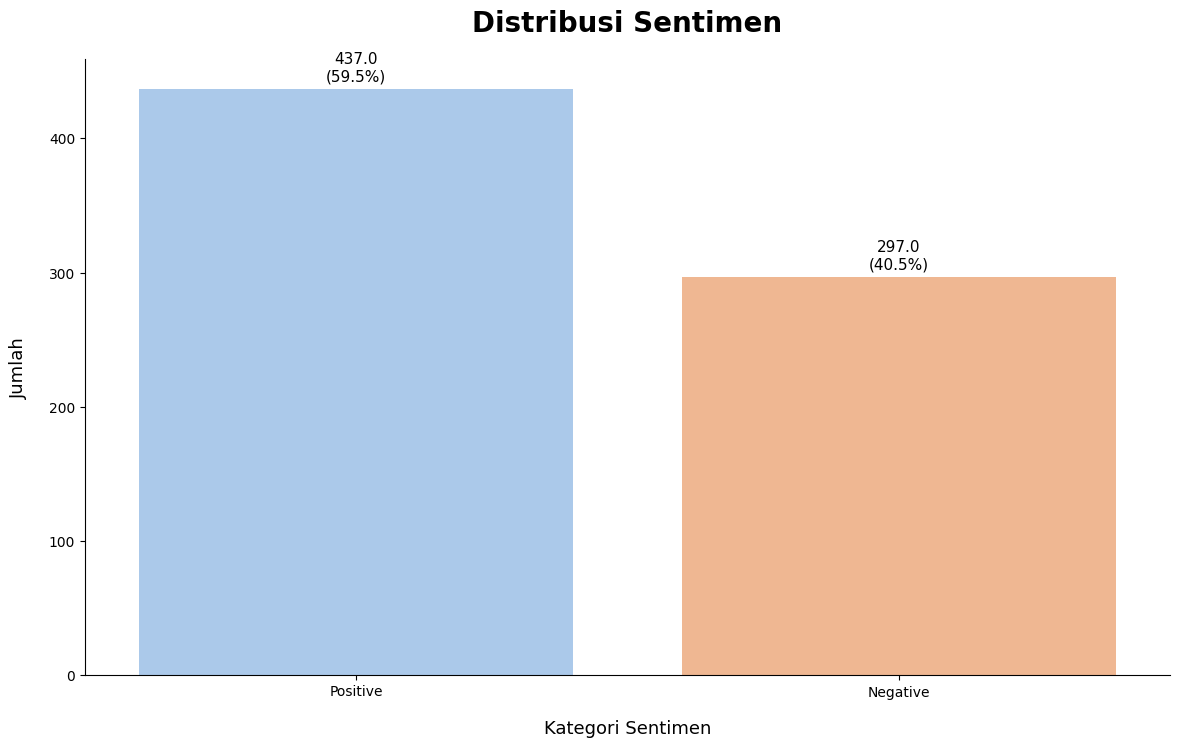

In [69]:
# Versi dengan persentase
total = len(df)
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='polarity', data=df, palette="pastel",
                  order=['Positive', 'Negative'])

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 3.25,
            f'{height}\n({height/total:.1%})',  # Menampilkan jumlah dan persentase
            ha='center',
            va='bottom',
            fontsize=11)

plt.title("Distribusi Sentimen", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Kategori Sentimen", fontsize=13, labelpad=15)
plt.ylabel("Jumlah", fontsize=13, labelpad=15)
sns.despine()
plt.show()

## **Wordcloud Visualization**

In [70]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import pandas as pd

# 1. Load the CSV file
LabelingData = pd.read_csv('LabelingData-KAI.csv')  # Adjust path if needed

# 2. Now process the data
review_all = []

for review in LabelingData['stemmed text']:  # Access the column properly
    if isinstance(review, str):  # Check if it's a string (to handle NaN safely)
        for token_review in review.split():  # Split if it's space-separated tokens
            review_all.append(token_review)
            print(token_review)

['tuju',
'laku',
'wajib',
'tiket',
'sesuai',
'lansia',
'milik',
'android',
'mudah',
'golong',
'aplikasi',
'matang',
'salah',
'monopoli',
'bayar',
'linkaja',
'berat',
'gojek',
'gopay',
'grab',
'linkaja',
'dompet',
'bagi',
'efektif',
'terima',
'kasih']
['bagus',
'hanya',
'terkadang',
'salah',
'aplikasi',
'tahap',
'benah',
'tolong',
'informasi',
'media',
'sosial',
'juga',
'guna',
'aplikasi',
'pelihara',
'benah',
'ukur',
'kembang',
'bagus',
'bintang',
'layan',
'muas']
['access',
'mudah',
'mes',
'tiket']
['pindah',
'kursi',
'ganti',
'sistematis',
'aplikasi',
'belum',
'mudah',
'pindah',
'kursi',
'tumpang',
'lebih',
'keren',
'kereta',
'alternatif',
'jalan',
'baik']
['layan',
'senang',
'jalan',
'lancar',
'duduk',
'desak',
'desa',
'dahulu',
'datang',
'waktu',
'hampir',
'rute']
['minggu',
'kereta',
'aplikasi',
'bagus',
'bantu',
'awal',
'kendala',
'aplikasi',
'buka',
'teknis',
'ikut',
'proses',
'buka',
'akun',
'verifikasi',
'masuk',
'aplikasi',
'kendala',
'masalah',
'metode',
'bayar',
'habis',
'm

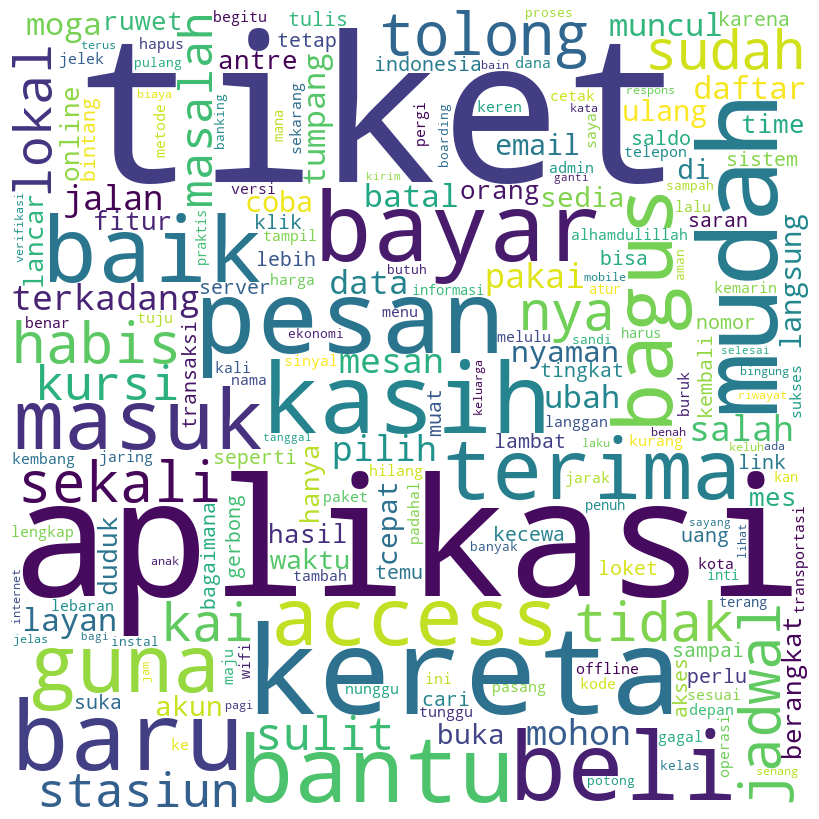

In [72]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string

# 1. Load dataset
LabelingData = pd.read_csv('LabelingData-KAI.csv')

# 2. Kumpulkan semua token dan bersihkan tanda baca
review_all = []

for review in LabelingData['stemmed text']:
    if isinstance(review, str):
        for token_review in review.split():
            # Hilangkan tanda baca di setiap token
            token_review = token_review.translate(str.maketrans('', '', string.punctuation))
            if token_review:  # pastikan bukan string kosong setelah dibersihkan
                review_all.append(token_review)

# 3. Hitung frekuensi kata
freq_dist = Counter(review_all)

# 4. Ambil 781 kata paling sering muncul
common_review = freq_dist.most_common(781)

# 5. Konversi ke dictionary
word_freq_dict = dict(common_review)

# 6. Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(word_freq_dict)

# 7. Tampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [73]:
from nltk.probability import FreqDist

In [74]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire KAI review")
freq_dist

how many frequency distribution samples from an entire KAI review


FreqDist({'tiket': 477, 'aplikasi': 477, 'kereta': 227, 'mudah': 177, 'pesan': 157, 'kasih': 138, 'bayar': 134, 'baru': 134, 'beli': 132, 'bantu': 123, ...})

In [75]:
# menampilkan kata yang paling sering muncul

common_review = freq_dist.most_common(781)
print(common_review)

[('tiket', 477), ('aplikasi', 477), ('kereta', 227), ('mudah', 177), ('pesan', 157), ('kasih', 138), ('bayar', 134), ('baru', 134), ('beli', 132), ('bantu', 123), ('baik', 119), ('terima', 117), ('masuk', 114), ('bagus', 111), ('access', 110), ('guna', 109), ('tolong', 104), ('jadwal', 98), ('habis', 94), ('sekali', 93), ('sudah', 87), ('tidak', 86), ('nya', 86), ('kai', 79), ('lokal', 75), ('stasiun', 74), ('kursi', 73), ('masalah', 68), ('sulit', 68), ('terkadang', 65), ('pilih', 65), ('salah', 64), ('mesan', 64), ('mohon', 64), ('jalan', 61), ('pakai', 61), ('data', 57), ('moga', 55), ('layan', 54), ('tumpang', 54), ('ubah', 54), ('batal', 54), ('daftar', 53), ('muncul', 53), ('nyaman', 48), ('langsung', 46), ('coba', 46), ('email', 45), ('ulang', 45), ('buka', 43), ('sedia', 43), ('di', 43), ('akun', 42), ('cepat', 41), ('waktu', 39), ('fitur', 35), ('hanya', 34), ('duduk', 34), ('online', 34), ('orang', 34), ('lancar', 33), ('antre', 33), ('time', 33), ('mes', 32), ('ruwet', 32), 

<Axes: title={'center': 'Top 20 Kata Terpopuler dari Review KAI'}, xlabel='Samples', ylabel='Counts'>

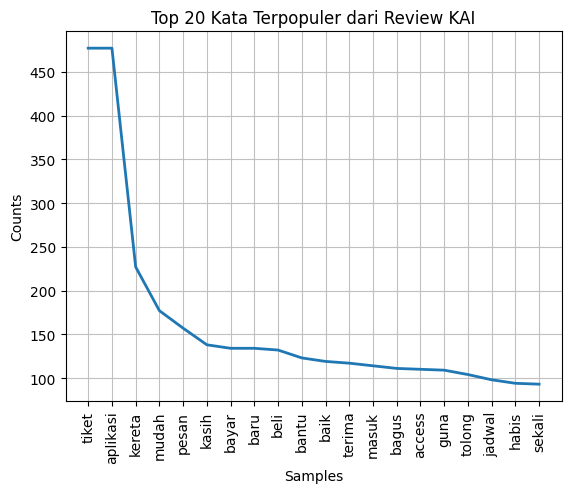

In [76]:
import matplotlib.pyplot as plt
freq_dist.plot(20, title="Top 20 Kata Terpopuler dari Review KAI")


In [77]:
# memasukkan sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
1,aplikasi,477
0,tiket,477
2,kereta,227
3,mudah,177
4,pesan,157
...,...,...
776,bgtt,2
777,bela,2
778,kaki,2
779,ngebug,2


In [78]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

In [79]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\2139954188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette=colors)


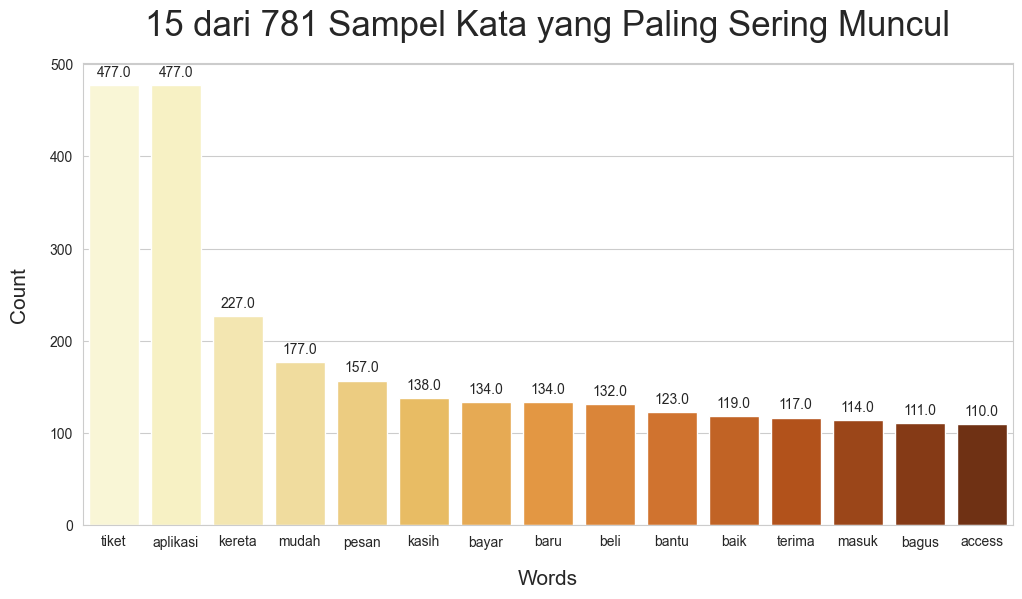

In [80]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
# Ambil 15 warna dari colormap 'rocket_r'
colors = sns.color_palette("YlOrBr", n_colors=15)
ax = sns.barplot(x='words', y='count', data=top15, palette=colors)
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 781 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

In [81]:
# Indonesia Sentiment lexicon (source: https://github.com/fajri91/InSet)
# Loads lexicon positive dan negative data
import csv

# Load lexicon positive
lexicon_positive = dict()
with open('../Dataset/Data Collection/Kamus/csv/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)  # skip header
    for row in reader:
        if len(row) >= 2:
            lexicon_positive[row[0].strip()] = int(row[1])

# Load lexicon negative
lexicon_negative = dict()
with open('../Dataset/Data Collection/Kamus/csv/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)  # skip header
    for row in reader:
        if len(row) >= 2:
            lexicon_negative[row[0].strip()] = int(row[1])


# Function to determine sentiment polarity
def analisis_sentimen_indonesia(text):
  # for word in text
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
    elif (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity = ''
  if(score > 0):
    polarity = 'Positive'
  elif(score < 0):
    polarity = 'Negative'
  return score, polarity
  # Contoh pengujian analisis sentimen pada string
string = "dengan aplikasi ini jadi lebih enak pesan tiket dari rumah"
hasil = analisis_sentimen_indonesia(string)
print(hasil)


(0, '')


In [82]:
# Contoh pengujian analisis sentimen pada string
string = "dengan aplikasi ini jadi lebih enak pesan tiket dari rumah"
hasil = analisis_sentimen_indonesia(string)
print(hasil)


(0, '')


In [83]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
labeling_kai = pd.read_csv('LabelingData-KAI.csv')

# Jika 'stemmed text' sudah berupa list, tidak perlu di split lagi, cukup salin ke kolom baru
labeling_kai['prepos_text'] = labeling_kai['stemmed text']

# Menampilkan beberapa contoh dari kolom baru untuk memastikan hasilnya
print(labeling_kai[['stemmed text', 'prepos_text']].head())


                                                                                                                                                                                                                                                 stemmed text                                                                                                                                                                                                                                                 prepos_text
0  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']  ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima

## **TF - IDF (VECTOR REPRESENTASI)**
**TF-IDF** dihitung dengan rumus:

$$
TF\text{-}IDF(t,d) = TF(t,d) \times IDF(t)
$$

**Term Frequency (TF)** dihitung dengan rumus:

$$
TF(t,d) = \frac{f_{t,d}}{N_d}
$$

Keterangan:
- \( f_{t,d} \) = jumlah kemunculan term \( t \) dalam dokumen \( d \)
- \( N_d \) = jumlah total kata dalam dokumen \( d \)


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import ast

# Baca file CSV
data = pd.read_csv('LabelingData-KAI.csv')

X = labeling_kai['stemmed text']
y = labeling_kai['polarity_num']

# Cek kolom yang tersedia
print(data.columns)


Index(['normalized', 'stemmed text', 'token_count', 'stemmed_list', 'polarity_score', 'polarity', 'polarity_num'], dtype='object')


In [85]:
# Buang data kosong di kolom stemmed_text
# Lihat 5 data awal
print(data['stemmed text'].head())

# Cek berapa banyak baris yang teksnya kosong setelah preprocessing
print('Jumlah baris kosong setelah preprocessing:', (data['stemmed text'].str.strip() == '').sum())


# Baru masuk ke TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['stemmed text'])



0    ['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']
1                                     ['bagus', 'hanya', 'terkadang', 'salah', 'aplikasi', 'tahap', 'benah', 'tolong', 'informasi', 'media', 'sosial', 'juga', 'guna', 'aplikasi', 'pelihara', 'benah', 'ukur', 'kembang', 'bagus', 'bintang', 'layan', 'muas']
2                                                                                                                                                                                                                           ['access', 'mudah', 'mes', 'tiket']
3                                                                                             ['pindah', 'kursi', 'ganti', 'sistematis', 'aplikasi', 'belum', 'mudah', 'pindah', 'kursi', 'tumpang', 'lebih', 'keren', 'kereta', 'altern

In [86]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Load data ---
# Misal data sudah dibaca ke variable 'data'
# Kalau belum:
# data = pd.read_csv('LabelingData-KAI.csv')

# --- 2. Bersihkan kolom stemmed text ---
data = data.dropna(subset=['stemmed text'])  # Buang baris yang NaN
data = data[data['stemmed text'].str.strip() != '']  # Buang baris yang kosong

# --- 3. Hitung TF-IDF ---
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['stemmed text'])

# Ubah ke DataFrame
tfidf_matrix = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# --- 4. Filter hanya kolom yang punya nilai (tidak semua 0) ---
filtered_tfidf_matrix = tfidf_matrix.loc[:, (tfidf_matrix != 0).any(axis=0)]

# --- 5. Tampilkan hasil ---
print(f"Ukuran awal TF-IDF Matrix: {tfidf_matrix.shape}")
print(f"Ukuran setelah filter: {filtered_tfidf_matrix.shape}")

display(filtered_tfidf_matrix)


Ukuran awal TF-IDF Matrix: (734, 1721)
Ukuran setelah filter: (734, 1721)


abis  acara  accces  acces    access  accesskami  accsses  acsess  acung  ada  adakan  adil  admin  adminnya  aduh  agam  agar  agen  agoda  agung  agustus  ajar  ajastress  ajatolong  aju  akal  akan  akhir  akibat  akses  aktif  aku  akun  akurat  alakadarnya  alam  alamat  alami  alangkah  alas  alat  alfamart  alhamdulillah  alhamdullilah  alhmdulillah  alias  alih  alir  allah  alot  already  alternatif  always  amal  aman  ambil  amin  ampas  ampun   an  anak  ancur  ancurkai  ancurtransportasi  anda  andal  andalkansangat   android  aneh  anggap  anggota  angkuh  angkut  anjay  antar  antarmuka  anti  antre  antri  antriantri  anyer  apa      apaa  apakah  apakok  apalagi  api  aplikadinya  aplikasi  aplikasinyabikin  apresiasi  april  arah  argo  armada  arus  asal  asli  aspek  astaga  astagaaaaaaaaaaaaa  asuransi  atas  atau  atik  atm  atur  availablebolak  awak  awal  awam  awas  awat      ayoo  babi  baca  backend  bagaiamana  bagaiman  bagaimana      bagi    bagus  bagusin  bagusmalah  bahan  baharu  bahaya      baik  bain  balap  balas  balik  balikin  balita  bandara  banding  bandung  banget  bangettt  bangettttt  bangetttttserver  bangga  bangku  bank  \
0     0.0    0.0     0.0    0.0  0.000000         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000     0.0   0.0   0.0    0.0   0.0    0.0    0.0  0.0   0.0    0.0       0.0                0.0   0.0    0.0             0.0  0.203015   0.0     0.0      0.0     0.0     0.0    0.0    0.0        0.0   0.0    0.0    0.0         0.0    0.0  0.0  0.000000     0.0     0.0      0.0  0.0          0.0  0.063800               0.0        0.0    0.0   0.0   0.0     0.0   0.0   0.0   0.0    0.0     0.0                 0.0       0.0   0.0   0.0   0.0  0.0   0.0             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0      0.0         0.0       0.0        0.0  0.193991  0.00000      0.0         0.0    0.0     0.0     0.0  0.000000   0.0    0.0    0.0    0.0      0.0     0.0      0.0      0.0      0.0     0.0       0.0         0.0               0.0     0.0     0.0   0.0   
1     0.0    0.0     0.0    0.0  0.000000         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000     0.0   0.0   0.0    0.0   0.0    0.0    0.0  0.0   0.0    0.0       0.0                0.0   0.0    0.0             0.0  0.000000   0.0     0.0      0.0     0.0     0.0    0.0    0.0        0.0   0.0    0.0    0.0         0.0    0.0  0.0  0.000000     0.0     0.0      0.0  0.0          0.0  0.148465               0.0        0.0    0.0   0.0   0.0     0.0   0.0   0.0   0.0    0.0     0.0                 0.0       0.0   0.0   0.0   0.0  0.0   0.0             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0      0.0         0.0       0.0        0.0  0.000000  0.24695      0.0         0.0    0.0     0.0     0.0  0.000000   0.0    0.0    0.0    0.0      0.0     0.0      0.0      0.0      0.0     0.0       0.0         0.0               0.0     0.0     0.0   0.0   
2     0.0    0.0     0.0    0.0  0.494924         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000 

In [87]:
# Buang data kosong di kolom stemmed_text
data = data.dropna(subset=['stemmed text'])
data = data[data['stemmed text'].str.strip() != '']

# Baru masuk ke TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['stemmed text'])

# Ubah jadi dataframe untuk lihat
tfidf_matrix = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# display(tfidf_matrix)

# Filter hanya kolom yang punya nilai (tidak semua 0)
filtered_matrix = tfidf_matrix.loc[:, (tfidf_matrix != 0).any(axis=0)]

display(filtered_matrix)




abis  acara  accces  acces    access  accesskami  accsses  acsess  acung  ada  adakan  adil  admin  adminnya  aduh  agam  agar  agen  agoda  agung  agustus  ajar  ajastress  ajatolong  aju  akal  akan  akhir  akibat  akses  aktif  aku  akun  akurat  alakadarnya  alam  alamat  alami  alangkah  alas  alat  alfamart  alhamdulillah  alhamdullilah  alhmdulillah  alias  alih  alir  allah  alot  already  alternatif  always  amal  aman  ambil  amin  ampas  ampun   an  anak  ancur  ancurkai  ancurtransportasi  anda  andal  andalkansangat   android  aneh  anggap  anggota  angkuh  angkut  anjay  antar  antarmuka  anti  antre  antri  antriantri  anyer  apa      apaa  apakah  apakok  apalagi  api  aplikadinya  aplikasi  aplikasinyabikin  apresiasi  april  arah  argo  armada  arus  asal  asli  aspek  astaga  astagaaaaaaaaaaaaa  asuransi  atas  atau  atik  atm  atur  availablebolak  awak  awal  awam  awas  awat      ayoo  babi  baca  backend  bagaiamana  bagaiman  bagaimana      bagi    bagus  bagusin  bagusmalah  bahan  baharu  bahaya      baik  bain  balap  balas  balik  balikin  balita  bandara  banding  bandung  banget  bangettt  bangettttt  bangetttttserver  bangga  bangku  bank  \
0     0.0    0.0     0.0    0.0  0.000000         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000     0.0   0.0   0.0    0.0   0.0    0.0    0.0  0.0   0.0    0.0       0.0                0.0   0.0    0.0             0.0  0.203015   0.0     0.0      0.0     0.0     0.0    0.0    0.0        0.0   0.0    0.0    0.0         0.0    0.0  0.0  0.000000     0.0     0.0      0.0  0.0          0.0  0.063800               0.0        0.0    0.0   0.0   0.0     0.0   0.0   0.0   0.0    0.0     0.0                 0.0       0.0   0.0   0.0   0.0  0.0   0.0             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0      0.0         0.0       0.0        0.0  0.193991  0.00000      0.0         0.0    0.0     0.0     0.0  0.000000   0.0    0.0    0.0    0.0      0.0     0.0      0.0      0.0      0.0     0.0       0.0         0.0               0.0     0.0     0.0   0.0   
1     0.0    0.0     0.0    0.0  0.000000         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000     0.0   0.0   0.0    0.0   0.0    0.0    0.0  0.0   0.0    0.0       0.0                0.0   0.0    0.0             0.0  0.000000   0.0     0.0      0.0     0.0     0.0    0.0    0.0        0.0   0.0    0.0    0.0         0.0    0.0  0.0  0.000000     0.0     0.0      0.0  0.0          0.0  0.148465               0.0        0.0    0.0   0.0   0.0     0.0   0.0   0.0   0.0    0.0     0.0                 0.0       0.0   0.0   0.0   0.0  0.0   0.0             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0      0.0         0.0       0.0        0.0  0.000000  0.24695      0.0         0.0    0.0     0.0     0.0  0.000000   0.0    0.0    0.0    0.0      0.0     0.0      0.0      0.0      0.0     0.0       0.0         0.0               0.0     0.0     0.0   0.0   
2     0.0    0.0     0.0    0.0  0.494924         0.0      0.0     0.0    0.0  0.0     0.0   0.0    0.0       0.0   0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0        0.0   0.000000  0.0   0.0   0.0    0.0     0.0    0.0    0.0  0.0   0.0     0.0          0.0   0.0     0.0    0.0       0.0   0.0   0.0       0.0            0.0            0.0           0.0    0.0   0.0   0.0    0.0   0.0      0.0    0.000000 

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_tf = CountVectorizer()
X_tf = vectorizer_tf.fit_transform(X)

import pandas as pd
tf_df = pd.DataFrame(X_tf.toarray(), columns=vectorizer_tf.get_feature_names_out())

print("Term Frequency (TF):")
# display(tf_df)
print(tf_df.head(10))


Term Frequency (TF):
   abis  acara  accces  acces  access  accesskami  accsses  acsess  acung  ada  adakan  adil  admin  adminnya  aduh  agam  agar  agen  agoda  agung  agustus  ajar  ajastress  ajatolong  aju  akal  akan  akhir  akibat  akses  aktif  aku  akun  akurat  alakadarnya  alam  alamat  alami  alangkah  alas  alat  alfamart  alhamdulillah  alhamdullilah  alhmdulillah  alias  alih  alir  allah  alot  already  alternatif  always  amal  aman  ambil  amin  ampas  ampun  an  anak  ancur  ancurkai  ancurtransportasi  anda  andal  andalkansangat  android  aneh  anggap  anggota  angkuh  angkut  anjay  antar  antarmuka  anti  antre  antri  antriantri  anyer  apa  apaa  apakah  apakok  apalagi  api  aplikadinya  aplikasi  aplikasinyabikin  apresiasi  april  arah  argo  armada  arus  asal  asli  aspek  astaga  astagaaaaaaaaaaaaa  asuransi  atas  atau  atik  atm  atur  availablebolak  awak  awal  awam  awas  awat  ayoo  babi  baca  backend  bagaiamana  bagaiman  bagaimana  bagi  bagus  

**Inverse Document Frequency (IDF)** dihitung dengan rumus:

$$
IDF(t) = \log \left( \frac{N}{df_t} \right)
$$

Keterangan:
- \( N \) = jumlah total dokumen
- \( df_t \) = jumlah dokumen yang mengandung term \( t \)


In [89]:
import numpy as np

# Jumlah dokumen
N = X_tf.shape[0]

# Banyak dokumen yang mengandung setiap kata
df = np.sum(X_tf.toarray() > 0, axis=0)

# Hitung IDF
idf = np.log((N) / (df))

idf_df = pd.DataFrame({
    "Term": vectorizer_tf.get_feature_names_out(),
    "DF": df,
    "IDF": idf
})
print("Inverse Document Frequency (IDF):")
display(idf_df)


Inverse Document Frequency (IDF):


,Term,DF,IDF
0,abis,10,4.295924
1,acara,1,6.598509
2,accces,2,5.905362
3,acces,1,6.598509
4,access,95,2.044632
...,...,...,...
1716,yakali,1,6.598509
1717,yang,3,5.499897
1718,yogyakarta,2,5.905362
1719,zaman,7,4.652599


In [90]:
for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        # print("test size:", test)
        # print("random state:", random)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test, random_state=random, stratify=y
        )

vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [91]:
y_train.shape

(440,)

In [92]:
X_train_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5653 stored elements and shape (440, 1263)>

In [93]:
print(X_train_vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5653 stored elements and shape (440, 1263)>
  Coords	Values
  (0, 64)	0.12280596245783121
  (0, 89)	0.1967111534428611
  (0, 1011)	0.2212235491942962
  (0, 105)	0.1845034056380209
  (0, 453)	0.2397798559529033
  (0, 948)	0.4341200419341846
  (0, 134)	0.1998698096191534
  (0, 1163)	0.12420598861828708
  (0, 56)	0.2929283252242001
  (0, 558)	0.30702680204212873
  (0, 3)	0.2103364655364145
  (0, 1006)	0.2777771317660929
  (0, 265)	0.26828745476429106
  (0, 1063)	0.4341200419341846
  (1, 64)	0.3447447224120702
  (1, 3)	0.1968210255518234
  (1, 111)	0.19565519588051025
  (1, 694)	0.403421634430592
  (1, 231)	0.5564127087386292
  (1, 23)	0.253872583741862
  (1, 528)	0.31814559293799943
  (1, 343)	0.31814559293799943
  (1, 1144)	0.18504125851069045
  (1, 512)	0.17510766483358742
  (2, 1163)	0.3464088548984477
  :	:
  (438, 121)	0.12185607809292348
  (438, 1206)	0.1531406044569688
  (438, 375)	0.13239351968144178
  (438, 541)	0.1009

In [94]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

# **Data Modeling SVM**

In [95]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import numpy as np

# Persiapan untuk menyimpan hasil
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []


In [96]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Pastikan X dan y sudah ada
X = labeling_kai['stemmed text']
y = labeling_kai['polarity_num']

# 2. Loop untuk split data
for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("test size:", test)
        print("random state:", random)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test, random_state=random, stratify=y
        )

        # Cek hasil split
        print("Jumlah data training:", len(X_train))
        print("Jumlah data testing:", len(X_test))



test size: 0.1
random state: 0
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.1
random state: 5
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.1
random state: 10
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.1
random state: 15
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.1
random state: 20
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.1
random state: 25
Jumlah data training: 660
Jumlah data testing: 74
test size: 0.2
random state: 0
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.2
random state: 5
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.2
random state: 10
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.2
random state: 15
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.2
random state: 20
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.2
random state: 25
Jumlah data training: 587
Jumlah data testing: 147
test size: 0.3

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import numpy as np

test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("test size:", test)
        print("random state:", random)

        # Stratify to preserve class balance
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test, random_state=random, stratify=y
        )

        # Skip jika y_train hanya memiliki 1 kelas
        if len(set(y_train)) < 2:
            print("Skipped - only one class in training set\n")
            continue

        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)

        SVM = SVC(kernel='linear')
        SVM.fit(X_train_vect, y_train)

        train_score = SVM.score(X_train_vect, y_train)
        print("Train Accuracy:", train_score)

        predict = SVM.predict(X_test_vect)

        accuracy = accuracy_score(y_test, predict)
        recall = recall_score(y_test, predict, average='weighted')
        precision = precision_score(y_test, predict, average='weighted')
        confusion = confusion_matrix(y_test, predict)
        classification = classification_report(y_test, predict)

        print("Confusion Matrix:\n", confusion)
        print("Classification Report:\n", classification)
        print("Accuracy Score:", round(accuracy, 2))
        print("Recall Score:", round(recall, 2))
        print("Precision Score:", round(precision, 2))
        print("\n")

        # Simpan hasil
        test_num.append(test)
        random_num.append(random)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        matrix.append(confusion)
        report.append(classification)



test size: 0.1
random state: 0
Train Accuracy: 0.9833333333333333
Confusion Matrix:
 [[21  9]
 [ 6 38]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.70      0.74        30
           1       0.81      0.86      0.84        44

    accuracy                           0.80        74
   macro avg       0.79      0.78      0.79        74
weighted avg       0.80      0.80      0.80        74

Accuracy Score: 0.8
Recall Score: 0.8
Precision Score: 0.8


test size: 0.1
random state: 5
Train Accuracy: 0.9803030303030303
Confusion Matrix:
 [[20 10]
 [ 3 41]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.87      0.67      0.75        30
           1       0.80      0.93      0.86        44

    accuracy                           0.82        74
   macro avg       0.84      0.80      0.81        74
weighted avg       0.83      0.82      0.82        74

Accuracy Score: 0.82
Recall S

In [98]:
print("Unique classes in y:", np.unique(y))
print("Class distribution:\n", y.value_counts())

Unique classes in y: [-1  1]
Class distribution:
 polarity_num
 1    437
-1    297
Name: count, dtype: int64


In [99]:
# Check if we have multiple classes before fitting
if len(np.unique(y_train)) > 1:
    SVM.fit(X_train_vect, y_train)
else:
    print(f"Skipping - only one class (value: {y_train.iloc[0]}) in training set")

In [100]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[21, 9], [6, 38]]",0.797297,0.797297,0.796051
1,0.1,5,"[[20, 10], [3, 41]]",0.824324,0.824324,0.830534
2,0.1,10,"[[22, 8], [6, 38]]",0.810811,0.810811,0.809720
3,0.1,15,"[[22, 8], [4, 40]]",0.837838,0.837838,0.838531
4,0.1,20,"[[23, 7], [3, 41]]",0.864865,0.864865,0.866511
...,...,...,...,...,...,...
19,0.4,5,"[[80, 39], [18, 157]]",0.806122,0.806122,0.807216
20,0.4,10,"[[82, 37], [20, 155]]",0.806122,0.806122,0.805928
21,0.4,15,"[[81, 38], [19, 156]]",0.806122,0.806122,0.806502
22,0.4,20,"[[90, 29], [16, 159]]",0.846939,0.846939,0.847085


In [101]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[21, 9], [6, 38]]",0.80,0.80,0.80
1,0.1,5,"[[20, 10], [3, 41]]",0.82,0.82,0.83
2,0.1,10,"[[22, 8], [6, 38]]",0.81,0.81,0.81
3,0.1,15,"[[22, 8], [4, 40]]",0.84,0.84,0.84
4,0.1,20,"[[23, 7], [3, 41]]",0.86,0.86,0.87
...,...,...,...,...,...,...
19,0.4,5,"[[80, 39], [18, 157]]",0.81,0.81,0.81
20,0.4,10,"[[82, 37], [20, 155]]",0.81,0.81,0.81
21,0.4,15,"[[81, 38], [19, 156]]",0.81,0.81,0.81
22,0.4,20,"[[90, 29], [16, 159]]",0.85,0.85,0.85


In [102]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()


In [103]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [104]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [106]:
X_train.shape

(660,)

In [107]:
X_test.shape

(74,)

In [108]:
X_train

565    ['minus', 'garagara', 'salah', 'habis', 'waktu', 'jadwal', 'hilang', 'habis', 'tiket', 'ngeselin', 'sekali', 'servernya', 'benah', 'sering', 'salah', 'habis', 'tiket', 'bagaimana', 'tidak', 'bisa', 'guna', 'seperti', 'ini', 'baru', 'bayar', 'di', 'tingkat', 'kan', 'dompet', 'rekening', 'qris', 'bayar', 'mudah', 'tolong', 'dbaca', 'komen']
609                                                                                                                                                                                                                                                                     ['tingkat', 'layan', 'bagus', 'onlinenya', 'kasih', 'bintang', 'servernya', 'down']
128                                                                                                                                                                                                                                                                                                             

In [109]:
print(X_train)

565    ['minus', 'garagara', 'salah', 'habis', 'waktu', 'jadwal', 'hilang', 'habis', 'tiket', 'ngeselin', 'sekali', 'servernya', 'benah', 'sering', 'salah', 'habis', 'tiket', 'bagaimana', 'tidak', 'bisa', 'guna', 'seperti', 'ini', 'baru', 'bayar', 'di', 'tingkat', 'kan', 'dompet', 'rekening', 'qris', 'bayar', 'mudah', 'tolong', 'dbaca', 'komen']
609                                                                                                                                                                                                                                                                     ['tingkat', 'layan', 'bagus', 'onlinenya', 'kasih', 'bintang', 'servernya', 'down']
128                                                                                                                                                                                                                                                                                                             

## **TF - IDF (VECTOR REPRESENTASI)**

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [112]:
y_train.shape

(660,)

In [113]:
X_train_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8686 stored elements and shape (660, 1636)>

In [114]:
print(X_train_vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8686 stored elements and shape (660, 1636)>
  Coords	Values
  (0, 936)	0.2263290776329738
  (0, 472)	0.249402650830584
  (0, 1268)	0.23835744383806298
  (0, 505)	0.32682939412578643
  (0, 1609)	0.13105176368784544
  (0, 586)	0.10894313137526214
  (0, 543)	0.1615533683472064
  (0, 1504)	0.12295256539016662
  (0, 997)	0.249402650830584
  (0, 1308)	0.10704043468603959
  (0, 1349)	0.1846269415448166
  (0, 186)	0.1801819312377534
  (0, 1344)	0.2263290776329738
  (0, 115)	0.15710835804014323
  (0, 1500)	0.11044510627374031
  (0, 218)	0.146507628958219
  (0, 503)	0.10190904687373929
  (0, 1336)	0.13969040600301327
  (0, 568)	0.14968032657839242
  (0, 148)	0.09888076652835734
  (0, 163)	0.19632973036232051
  (0, 356)	0.13201670457287235
  (0, 1516)	0.1436111829618965
  (0, 649)	0.1666847561595067
  (0, 387)	0.1897583293571169
  :	:
  (657, 931)	0.38559168676626226
  (657, 887)	0.38559168676626226
  (657, 481)	0.34378884658019765
  (

In [115]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

## **Data Modeling**

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [117]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [118]:
predict = svm.predict(X_test_vect)

In [119]:
predict

array([ 1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1, -1])

In [120]:
predict_df = pd.DataFrame(predict, columns=['predict'])
predict_df['y_actual'] = y_test.ravel()

C:\Users\sonic\AppData\Local\Temp\ipykernel_3684\3576182423.py:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



In [121]:
predict_df

,predict,y_actual
0,1,1
1,-1,-1
2,1,1
3,-1,-1
4,1,-1
...,...,...
69,-1,-1
70,-1,1
71,1,1
72,1,1


In [122]:
print(svm.coef_) # values of weight

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1501 stored elements and shape (1, 1636)>
  Coords	Values
  (0, 817)	0.24674135050439494
  (0, 655)	0.4934827010087899
  (0, 453)	0.24674135050439494
  (0, 1454)	0.07926680187493698
  (0, 378)	0.07926680187493698
  (0, 328)	0.07926680187493698
  (0, 1447)	0.2650927720945613
  (0, 1291)	0.2650927720945613
  (0, 1212)	0.09041463377883947
  (0, 700)	0.09041463377883947
  (0, 445)	0.09041463377883947
  (0, 15)	0.17731765247466316
  (0, 329)	0.5207208617674404
  (0, 203)	0.47254618968797135
  (0, 1582)	0.20174959909983575
  (0, 961)	0.20174959909983575
  (0, 643)	0.18308466459767317
  (0, 1398)	0.26444988831880895
  (0, 796)	0.2914097642615672
  (0, 85)	0.2914097642615672
  (0, 1617)	0.2925099354275685
  (0, 938)	0.05971628171515709
  (0, 993)	0.6137995969933902
  (0, 1426)	0.3060009913557612
  (0, 844)	0.36335339898975305
  :	:
  (0, 327)	-0.5035937972168585
  (0, 181)	1.294486128135153
  (0, 27)	-0.2596838601869104
  (0, 4)	0.9

In [123]:
print(svm.intercept_) # values of b

[0.09030456]


In [124]:
print(svm.classes_) # class of sentiment

[-1  1]


In [125]:
print(svm.dual_coef_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 482 stored elements and shape (1, 482)>
  Coords	Values
  (0, 0)	-1.0
  (0, 1)	-1.0
  (0, 2)	-1.0
  (0, 3)	-0.891146152761067
  (0, 4)	-1.0
  (0, 5)	-1.0
  (0, 6)	-0.9808980642869415
  (0, 7)	-1.0
  (0, 8)	-0.06915289392745955
  (0, 9)	-1.0
  (0, 10)	-1.0
  (0, 11)	-0.31538851937122003
  (0, 12)	-0.19232741959199173
  (0, 13)	-1.0
  (0, 14)	-1.0
  (0, 15)	-0.6426485595676775
  (0, 16)	-1.0
  (0, 17)	-0.36627757353635243
  (0, 18)	-1.0
  (0, 19)	-0.3789614516070812
  (0, 20)	-1.0
  (0, 21)	-0.461208439349164
  (0, 22)	-1.0
  (0, 23)	-1.0
  (0, 24)	-1.0
  :	:
  (0, 457)	1.0
  (0, 458)	1.0
  (0, 459)	1.0
  (0, 460)	0.6981092852181806
  (0, 461)	0.21515996037330784
  (0, 462)	0.24796980044971295
  (0, 463)	1.0
  (0, 464)	1.0
  (0, 465)	0.8758166623191138
  (0, 466)	0.0821606688645299
  (0, 467)	1.0
  (0, 468)	1.0
  (0, 469)	0.9732927109198733
  (0, 470)	1.0
  (0, 471)	1.0
  (0, 472)	0.559911760899889
  (0, 473)	0.058508005618109

In [126]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9787878787878788

In [127]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.8378378378378378

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Encode label jadi angka
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predict_encoded = le.transform(predict)

# Hitung Mean Squared Error
mse = mean_squared_error(y_test_encoded, predict_encoded)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.16216216216216217


## **Final Visualization that represented the result of Predicted**

In [129]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
    if sentiment == 1:
        polarity = "positif"
    elif sentiment == -1:
        polarity = "negatif"
    sentimen.append(polarity)


predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

45
29


In [130]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,29
1,1,45


In [131]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 60.81 %
percentage of negative sentiment: 39.19 %
difference between percentage positive and negative: 21.62 %


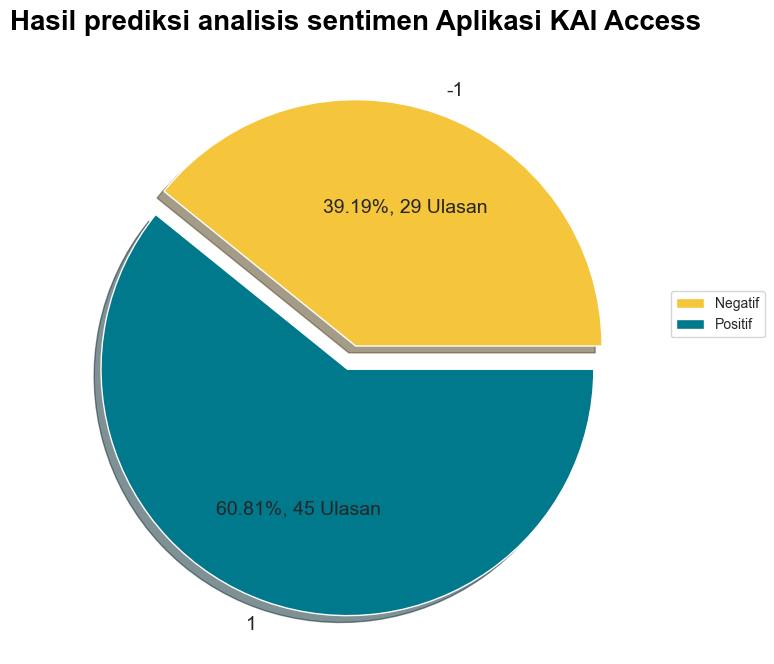

In [132]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#f5c63c','#00798c']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen Aplikasi KAI Access', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

plt.show()

## **EVALUASI**

In [133]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[25,  8],
       [ 4, 37]])

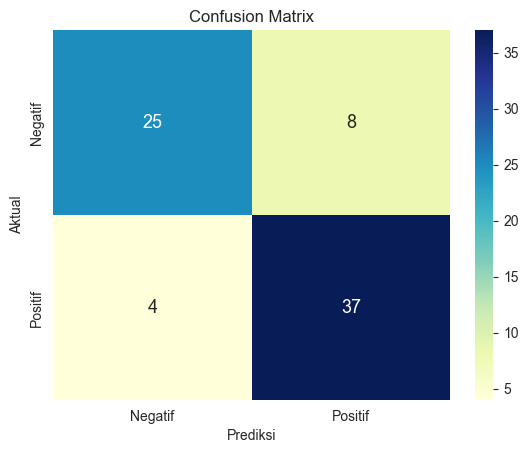

In [134]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negatif', 'Positif'])
ax.yaxis.set_ticklabels(['Negatif', 'Positif'])
plt.show()

In [135]:
target_names = ['Negative', 'Positive']
print(classification_report(y_test, predict, target_names=target_names))


              precision    recall  f1-score   support

    Negative       0.86      0.76      0.81        33
    Positive       0.82      0.90      0.86        41

    accuracy                           0.84        74
   macro avg       0.84      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



In [136]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

akurasi = accuracy_score(y_test, predict)
print("Akurasi model:", round(akurasi, 2))

recall = recall_score(y_test, predict, average='weighted')
print("Sensitivitas model:", round(recall, 2))

precision = precision_score(y_test, predict, average='weighted')
print("Presisi model:", round(precision, 2))


Akurasi model: 0.84
Sensitivitas model: 0.84
Presisi model: 0.84


## **Membuat Database**

In [137]:

df = pd.read_csv("LabelingData-KAI.csv") 
df.head()

,normalized,stemmed text,token_count,stemmed_list,polarity_score,polarity,polarity_num
0,"['setuju', 'pemberlakuan', 'wajib', 'tiket', 'sesuai', 'lansia', 'memiliki', 'android', 'memudahkan', 'golongan', 'aplikasi', 'matang', 'kesalahan', 'monopoli', 'pembayaran', 'linkaja', 'memberatkan', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'dibagi', 'efektif', 'terima', 'kasih']","['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']",250,"['tuju', 'laku', 'wajib', 'tiket', 'sesuai', 'lansia', 'milik', 'android', 'mudah', 'golong', 'aplikasi', 'matang', 'salah', 'monopoli', 'bayar', 'linkaja', 'berat', 'gojek', 'gopay', 'grab', 'linkaja', 'dompet', 'bagi', 'efektif', 'terima', 'kasih']",16,Positive,1
1,"['bagus', 'hanya', 'terkadang', 'kesalahan', 'aplikasi', 'tahap', 'pembenahan', 'tolong', 'diinformasikan', 'media', 'sosialnya', 'juga', 'pengguna', 'aplikasinya', 'pemeliharaan', 'pembenahan', 'ukuran', 'pengembangan', 'bagus', 'bintang', 'pelayanan', 'memuaskan']","['bagus', 'hanya', 'terkadang', 'salah', 'aplikasi', 'tahap', 'benah', 'tolong', 'informasi', 'media', 'sosial', 'juga', 'guna', 'aplikasi', 'pelihara', 'benah', 'ukur', 'kembang', 'bagus', 'bintang', 'layan', 'muas']",217,"['bagus', 'hanya', 'terkadang', 'salah', 'aplikasi', 'tahap', 'benah', 'tolong', 'informasi', 'media', 'sosial', 'juga', 'guna', 'aplikasi', 'pelihara', 'benah', 'ukur', 'kembang', 'bagus', 'bintang', 'layan', 'muas']",18,Positive,1
2,"['access', 'mudah', 'memesan', 'tiket']","['access', 'mudah', 'mes', 'tiket']",35,"['access', 'mudah', 'mes', 'tiket']",4,Positive,1
3,"['pindah', 'kursi', 'mengganti', 'sistematis', 'aplikasi', 'sebelum', 'mudah', 'pemindahan', 'kursi', 'penumpang', 'selebih', 'keren', 'kereta', 'alternatif', 'perjalanan', 'terbaik']","['pindah', 'kursi', 'ganti', 'sistematis', 'aplikasi', 'belum', 'mudah', 'pindah', 'kursi', 'tumpang', 'lebih', 'keren', 'kereta', 'alternatif', 'jalan', 'baik']",161,"['pindah', 'kursi', 'ganti', 'sistematis', 'aplikasi', 'belum', 'mudah', 'pindah', 'kursi', 'tumpang', 'lebih', 'keren', 'kereta', 'alternatif', 'jalan', 'baik']",2,Positive,1
4,"['pelayanan', 'menyenangkan', 'perjalanan', 'lancar', 'duduk', 'berdesak', 'desakan', 'dahulu', 'datangnya', 'waktu', 'hampir', 'rute']","['layan', 'senang', 'jalan', 'lancar', 'duduk', 'desak', 'desa', 'dahulu', 'datang', 'waktu', 'hampir', 'rute']",111,"['layan', 'senang', 'jalan', 'lancar', 'duduk', 'desak', 'desa', 'dahulu', 'datang', 'waktu', 'hampir', 'rute']",12,Positive,1


In [138]:
import sqlite3
import pandas as pd

# Load CSV
df = pd.read_csv("LabelingData-KAI.csv") 
df = df[["normalized", "polarity"]]      # ambil kolom yang dibutuhkan
df.columns = ["komentar", "sentimen"]    # rename kolom

# Masukkan ke SQLite
conn = sqlite3.connect("DatabaseKAI.db")
df.to_sql("komentar", conn, if_exists="replace", index=False)
conn.close()

print("Data berhasil dimasukkan ke database.")


Data berhasil dimasukkan ke database.


## **Menghitung TF-IDF**

In [139]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import math

# 1. Ambil 3 contoh ulasan dari dataset
df = pd.read_csv("LabelingData-KAI.csv")
df['joined_stemmed_text'] = df['stemmed text'].apply(lambda tokens: ' '.join(eval(tokens)))
samples = df['joined_stemmed_text'].head()

# 2. Hitung Term Frequency (TF)
count_vect = CountVectorizer()
term_matrix = count_vect.fit_transform(samples)
tf_df = pd.DataFrame(term_matrix.toarray(), columns=count_vect.get_feature_names_out())
tf_df.index = [f"D{i+1}" for i in range(len(samples))]

# 3. Hitung Document Frequency (DF) dan IDF manual
df_series = (term_matrix > 0).sum(axis=0).A1  # jumlah dokumen yang mengandung setiap kata
idf_vals = [math.log((1 + len(samples)) / (1 + df)) + 1 for df in df_series]
idf_df = pd.DataFrame({
    "Term": count_vect.get_feature_names_out(),
    "DF": df_series,
    "IDF": idf_vals
})

# 4. Hitung TF-IDF manual (TF * IDF)
tfidf_manual = tf_df.copy()
for term in tfidf_manual.columns:
    tfidf_manual[term] = tfidf_manual[term] * idf_df[idf_df['Term'] == term]['IDF'].values[0]


In [140]:
# 5. Tampilkan tabel
print("=== Term Frequency (TF) ===")
display(tf_df)

=== Term Frequency (TF) ===


,access,alternatif,android,aplikasi,bagi,bagus,baik,bayar,belum,benah,berat,bintang,dahulu,datang,desa,desak,dompet,duduk,efektif,ganti,gojek,golong,gopay,grab,guna,hampir,hanya,informasi,jalan,juga,kasih,kembang,keren,kereta,kursi,laku,lancar,lansia,layan,lebih,linkaja,matang,media,mes,milik,monopoli,muas,mudah,pelihara,pindah,rute,salah,senang,sesuai,sistematis,sosial,tahap,terima,terkadang,tiket,tolong,tuju,tumpang,ukur,wajib,waktu
D1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,2,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
D2,0,0,0,2,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0
D3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
D4,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
D5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
print("\n=== Document Frequency (DF) dan Inverse Document Frequency (IDF) ===")
display(idf_df)


=== Document Frequency (DF) dan Inverse Document Frequency (IDF) ===


,Term,DF,IDF
0,access,1,2.098612
1,alternatif,1,2.098612
2,android,1,2.098612
3,aplikasi,3,1.405465
4,bagi,1,2.098612
...,...,...,...
61,tuju,1,2.098612
62,tumpang,1,2.098612
63,ukur,1,2.098612
64,wajib,1,2.098612


In [142]:
print("\n=== TF-IDF Manual ===")
display(tfidf_manual)


=== TF-IDF Manual ===


,access,alternatif,android,aplikasi,bagi,bagus,baik,bayar,belum,benah,berat,bintang,dahulu,datang,desa,desak,dompet,duduk,efektif,ganti,gojek,golong,gopay,grab,guna,hampir,hanya,informasi,jalan,juga,kasih,kembang,keren,kereta,kursi,laku,lancar,lansia,layan,lebih,linkaja,matang,media,mes,milik,monopoli,muas,mudah,pelihara,pindah,rute,salah,senang,sesuai,sistematis,sosial,tahap,terima,terkadang,tiket,tolong,tuju,tumpang,ukur,wajib,waktu
D1,0.000000,0.000000,2.098612,1.405465,2.098612,0.000000,0.000000,2.098612,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,2.098612,2.098612,2.098612,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,4.197225,2.098612,0.000000,0.000000,2.098612,2.098612,0.000000,1.405465,0.000000,0.000000,0.000000,1.693147,0.000000,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,1.693147,0.000000,2.098612,0.000000,0.000000,2.098612,0.000000
D2,0.000000,0.000000,0.000000,2.810930,0.000000,4.197225,0.000000,0.000000,0.000000,4.197225,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,2.098612,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,2.098612,2.098612,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,2.098612,0.000000,0.000000
D3,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,1.405465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D4,0.000000,2.098612,0.000000,1.405465,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,2.098612,2.098612,4.197225,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.405465,0.000000,4.197225,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000
D5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,2.098612,2.098612,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612


## **SVM**

In [143]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Baca data
df = pd.read_csv("LabelingData-KAI.csv")
df['joined_stemmed_text'] = df['stemmed text'].apply(lambda tokens: ' '.join(eval(tokens)))

# 2. Ambil fitur (X) dan label (y)
X = df['joined_stemmed_text']
y = df['polarity']  # Ganti dengan nama kolom label yang sesuai, misalnya 'sentiment' atau 'kategori'

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Training model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 6. Evaluasi
y_pred = model.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy Score ===")
print("Akurasi:", accuracy_score(y_test, y_pred))


=== Confusion Matrix ===
[[44 14]
 [ 9 80]]

=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.83      0.76      0.79        58
    Positive       0.85      0.90      0.87        89

    accuracy                           0.84       147
   macro avg       0.84      0.83      0.83       147
weighted avg       0.84      0.84      0.84       147


=== Accuracy Score ===
Akurasi: 0.8435374149659864


## **Memasukkan hasil prediksi model**

In [144]:
# Ambil akurasi terbaik dari semua percobaan
akurasi_terbaik = accuracy_score(y_test, y_pred)

# Simpan ke file agar bisa dibaca oleh Flask
with open('../static/akurasi.txt', 'w') as f:
    f.write(str(round(akurasi_terbaik * 100, 2)))  # dalam persen
